# Demo

In [ ]:
import pymc as pm
import numpy as np

# Assume 10 trials and 5 successes out of those trials
# Change these numbers to see how the posterior plot changes
trials = 10; successes = 5

# Set up model context
with pm.Model() as coin_flip_model:
    # Probability p of success we want to estimate
    # and assign Beta prior
    p = pm.Beta("p", alpha=1, beta=1)

    # Define likelihood
    obs = pm.Binomial("obs", p=p, n=trials,
        observed=successes,
    )

    # Hit Inference Button
    idata = pm.sample()

In [ ]:
import arviz as az

az.plot_posterior(idata, show=True);

In [ ]:
pm.plot_trace(idata)

In [ ]:
pm.summary(idata)

In [ ]:
pm.find_MAP(model=coin_flip_model)

# Continuous

## pymc.AsymmetricLaplace


In [ ]:
import numpy as np
from scipy.stats import laplace_asymmetric
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

In [ ]:
kappa = 2
mean, var, skew, kurt = laplace_asymmetric.stats(kappa, moments='mvsk')

In [ ]:
x = np.linspace(laplace_asymmetric.ppf(0.01, kappa),
                laplace_asymmetric.ppf(0.99, kappa), 100)
ax.plot(x, laplace_asymmetric.pdf(x, kappa),
       'r-', lw=5, alpha=0.6, label='laplace_asymmetric pdf')

In [ ]:
rv = laplace_asymmetric(kappa)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

In [ ]:
vals = laplace_asymmetric.ppf([0.001, 0.5, 0.999], kappa)
np.allclose([0.001, 0.5, 0.999], laplace_asymmetric.cdf(vals, kappa))

True

In [ ]:
r = laplace_asymmetric.rvs(kappa, size=1000)

In [ ]:
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

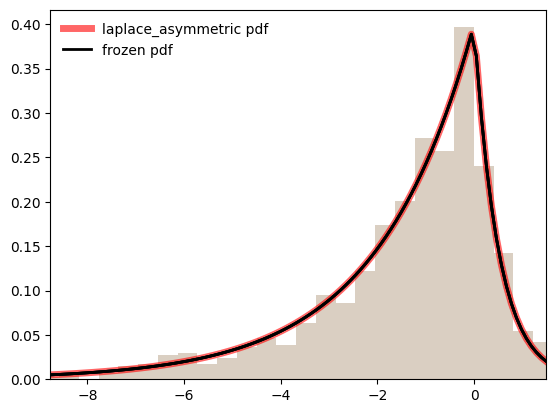

In [ ]:
fig

## pymc.Beta

(array([417.,  32.,  25.,  21.,  30.,  12.,  18.,  23.,  33., 389.]),
 array([6.09182502e-28, 1.00000000e-01, 2.00000000e-01, 3.00000000e-01,
        4.00000000e-01, 5.00000000e-01, 6.00000000e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

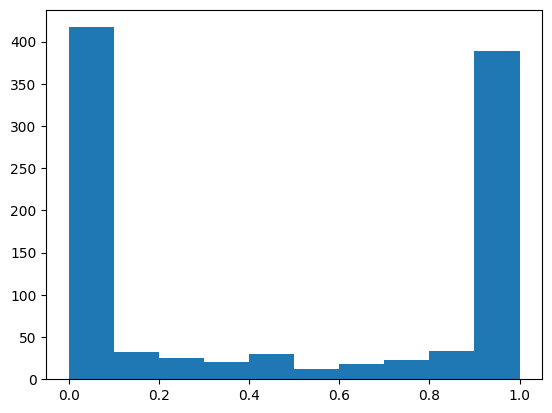

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# ベータ分布を定義
beta_dist = stats.beta(0.1, 0.1)

# 定義したベータ分布から1000個のサンプルを生成
X = beta_dist.rvs(1000)

# ヒストグラムを描く
plt.hist(X, bins=10)

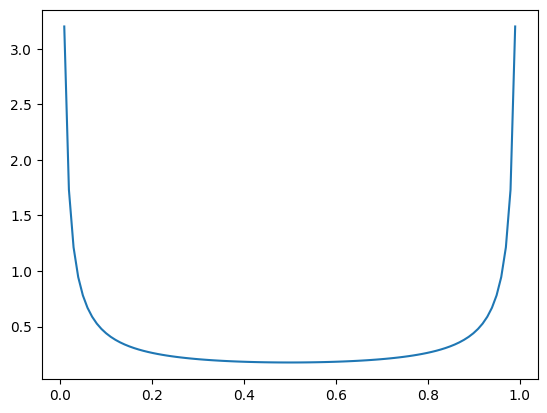

In [ ]:
# 確率密度関数を描画する
ls = np.linspace(0, 1, 100)
plt.plot(ls, beta_dist.pdf(ls))

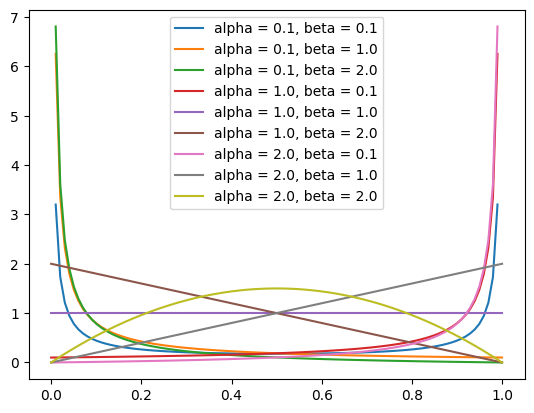

In [ ]:
# ベータ分布の定義域は(0, 1)
ls = np.linspace(0,1,100)

# 各パラメータを変えてベータ分布をプロットしてみる
alpha_list = [0.1, 1.0, 2.0]
beta_list = [0.1, 1.0, 2.0]
for alpha in alpha_list:
  for beta in beta_list:
    beta_dist = stats.beta(alpha, beta)
    plt.plot(ls, beta_dist.pdf(ls),
             label='alpha = ' + str(alpha) + ', beta = ' + str(beta))
plt.legend()

## pymc.Cauchy

In [ ]:
import numpy as np
from scipy.stats import cauchy
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

In [ ]:
mean, var, skew, kurt = cauchy.stats(moments='mvsk')

In [ ]:
x = np.linspace(cauchy.ppf(0.01),
                cauchy.ppf(0.99), 100)
ax.plot(x, cauchy.pdf(x),
       'r-', lw=5, alpha=0.6, label='cauchy pdf')

In [ ]:
rv = cauchy()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

In [ ]:
vals = cauchy.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], cauchy.cdf(vals))

True

In [ ]:
r = cauchy.rvs(size=1000)

In [ ]:
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

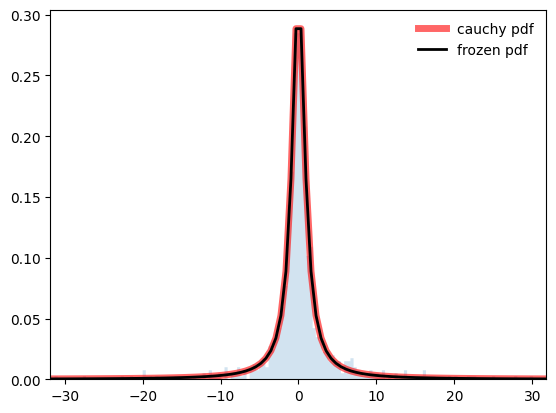

In [ ]:
fig

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import cauchy

# # Cauchy parameters
# location = 0.0  # Location parameter (median)
# scale = 1.0     # Scale parameter

# # Generate random data from Cauchy distribution
# data = cauchy.rvs(loc=location, scale=scale, size=1000)

# # Plot the histogram of the generated data
# plt.hist(data, bins=30, density=True, alpha=0.5, color='b', label='Cauchy Data')

# # Calculate and plot the probability density function (PDF)
# x = np.linspace(cauchy.ppf(0.01, loc=location, scale=scale), cauchy.ppf(0.99, loc=location, scale=scale), 100)
# pdf = cauchy.pdf(x, loc=location, scale=scale)
# plt.plot(x, pdf, 'r-', lw=2, label='Cauchy PDF')

# # Add labels and legend to the plot
# plt.xlabel('Value')
# plt.ylabel('Probability Density')
# plt.legend()

# # Show the plot
# plt.title('Cauchy Distribution')
# plt.show()

## pymc.ChiSquared

In [ ]:
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

In [ ]:
df = 55
mean, var, skew, kurt = chi2.stats(df, moments='mvsk')

In [ ]:
x = np.linspace(chi2.ppf(0.01, df),
                chi2.ppf(0.99, df), 100)
ax.plot(x, chi2.pdf(x, df),
       'r-', lw=5, alpha=0.6, label='chi2 pdf')

In [ ]:
rv = chi2(df)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

In [ ]:
vals = chi2.ppf([0.001, 0.5, 0.999], df)
np.allclose([0.001, 0.5, 0.999], chi2.cdf(vals, df))

True

In [ ]:
r = chi2.rvs(df, size=1000)

In [ ]:
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

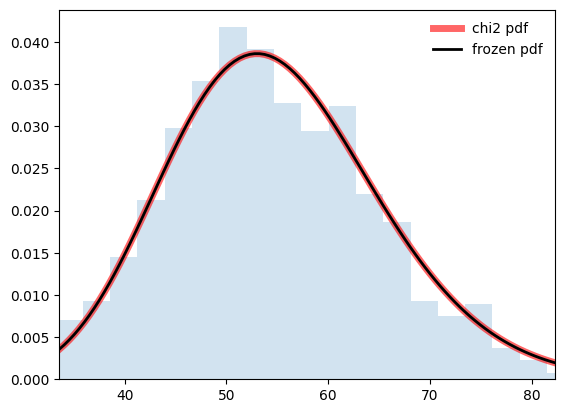

In [ ]:
fig

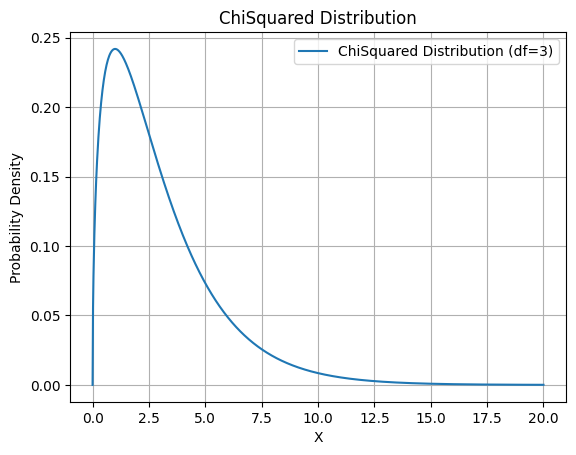

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 自由度（degrees of freedom）を設定
degrees_of_freedom = 3

# ChiSquared分布の確率密度関数（Probability Density Function）を計算する範囲を定義
x = np.linspace(0, 20, 1000)

# ChiSquared分布の確率密度関数を計算
pdf = stats.chi2.pdf(x, degrees_of_freedom)

# 結果をプロット
plt.plot(x, pdf, label=f'ChiSquared Distribution (df={degrees_of_freedom})')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('ChiSquared Distribution')
plt.legend()
plt.grid(True)
plt.show()

## pymc.ExGaussian

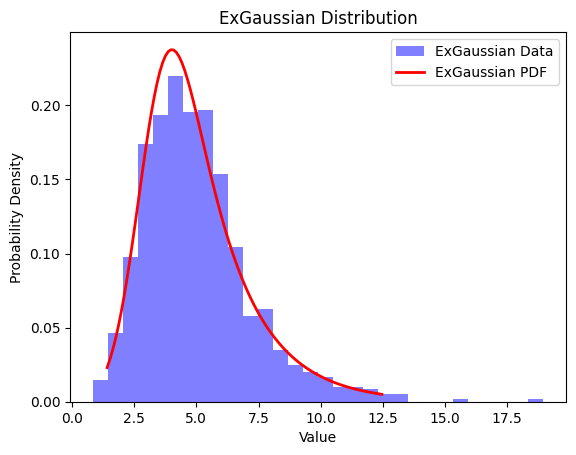

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import exponnorm

# ExGaussian parameters
mu = 3.0    # Mean of the Gaussian component
sigma = 1.0 # Standard deviation of the Gaussian component
lam = 2.0   # Rate parameter of the exponential component

# Generate random data from ExGaussian distribution
data = exponnorm.rvs(lam, loc=mu, scale=sigma, size=1000)

# Plot the histogram of the generated data
plt.hist(data, bins=30, density=True, alpha=0.5, color='b', label='ExGaussian Data')

# Calculate and plot the probability density function (PDF)
x = np.linspace(exponnorm.ppf(0.01, lam, loc=mu, scale=sigma), exponnorm.ppf(0.99, lam, loc=mu, scale=sigma), 100)
pdf = exponnorm.pdf(x, lam, loc=mu, scale=sigma)
plt.plot(x, pdf, 'r-', lw=2, label='ExGaussian PDF')

# Add labels and legend to the plot
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.title('ExGaussian Distribution')
plt.show()

## pymc.Exponential

In [ ]:
from numpy import random

x = random.exponential(scale=2, size=(2, 3))

print(x)

<ipython-input-64-7836324b8821>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.exponential(size=1000), hist=False)


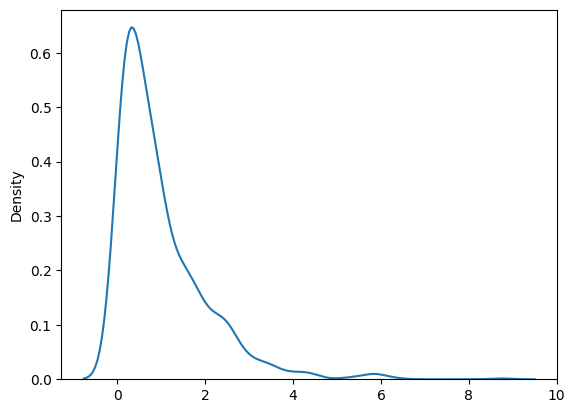

In [ ]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(random.exponential(size=1000), hist=False)

plt.show()

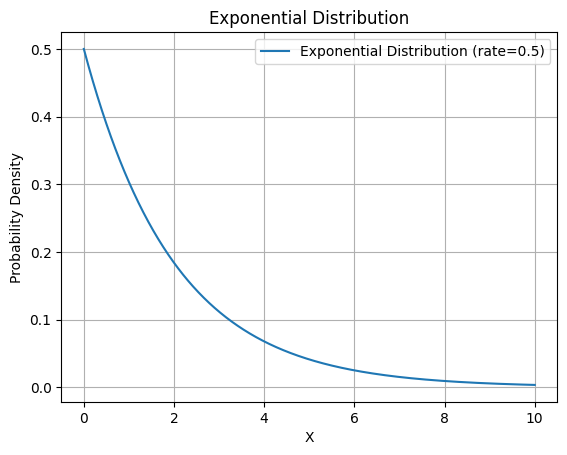

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Exponential分布のパラメータ（レート）を設定
rate = 0.5  # レートパラメータ（逆数の期待値）

# Exponential分布の確率密度関数（Probability Density Function）を計算する範囲を定義
x = np.linspace(0, 10, 1000)

# Exponential分布の確率密度関数を計算
pdf = stats.expon.pdf(x, scale=1 / rate)

# 結果をプロット
plt.plot(x, pdf, label=f'Exponential Distribution (rate={rate})')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Exponential Distribution')
plt.legend()
plt.grid(True)
plt.show()


## pymc.Flat

In [ ]:
x = np.float32(5*0.99999999)

In [ ]:
s = np.random.uniform(-1,0,1000)

In [ ]:
np.all(s >= -1)

True

In [ ]:
np.all(s < 0)

True

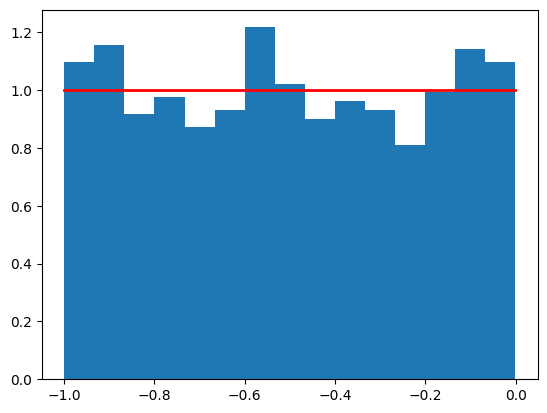

In [ ]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

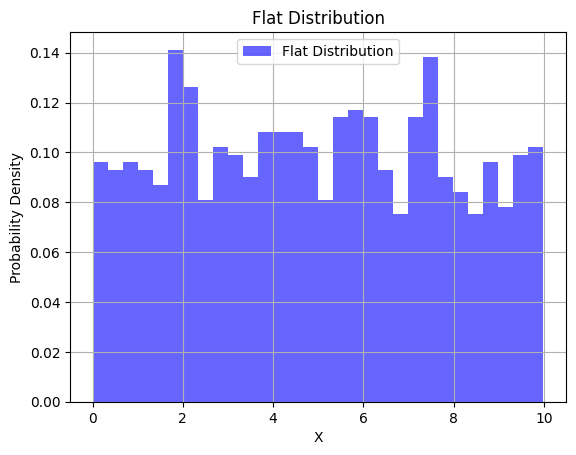

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 平坦分布の範囲を設定
lower_bound = 0  # 分布の下限
upper_bound = 10  # 分布の上限

# サンプル数を指定
sample_size = 1000

# 平坦分布のランダムサンプルを生成
flat_samples = np.random.uniform(lower_bound, upper_bound, sample_size)

# ヒストグラムをプロットして分布を可視化
plt.hist(flat_samples, bins=30, density=True, alpha=0.6, color='b', label='Flat Distribution')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Flat Distribution')
plt.legend()
plt.grid(True)
plt.show()


## pymc.Gamma

(array([474., 213., 144.,  77.,  43.,  22.,  12.,   6.,   4.,   5.]),
 array([6.98385363e-04, 5.89330067e-01, 1.17796175e+00, 1.76659343e+00,
        2.35522511e+00, 2.94385680e+00, 3.53248848e+00, 4.12112016e+00,
        4.70975184e+00, 5.29838352e+00, 5.88701520e+00]),
 <a list of 10 Patch objects>)

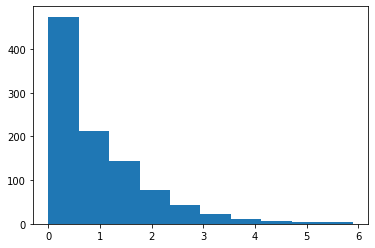

In [ ]:
# ガンマ分布を定義
alpha = 1.0
theta = 1.0
gamma_dist = stats.gamma(a=alpha, scale=theta)

# 定義したガンマ分布から1000個のサンプルを生成
X = gamma_dist.rvs(1000)

# ヒストグラムを描く
plt.hist(X, bins=10)

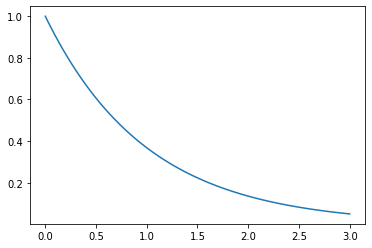

In [ ]:
ls = np.linspace(0, 3, 100)
plt.plot(ls, gamma_dist.pdf(ls))

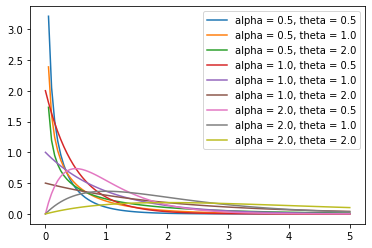

In [ ]:
# ガンマ分布の定義域（5で打ち切り）
ls = np.linspace(0,5,100)

# パラメータを変えてベータ分布をプロット
alpha_list = [0.5, 1.0, 2.0]
theta_list = [0.5, 1.0, 2.0]
for alpha in alpha_list:
  for theta in theta_list:
    gamma_dist = stats.gamma(a=alpha, scale=theta)
    plt.plot(ls, gamma_dist.pdf(ls),
             label='alpha = ' + str(alpha) + ', theta = ' + str(theta))
plt.legend()

## pymc.Gumbel

In [ ]:
mu, beta = 0, 0.1 # location and scale
s = np.random.gumbel(mu, beta, 1000)

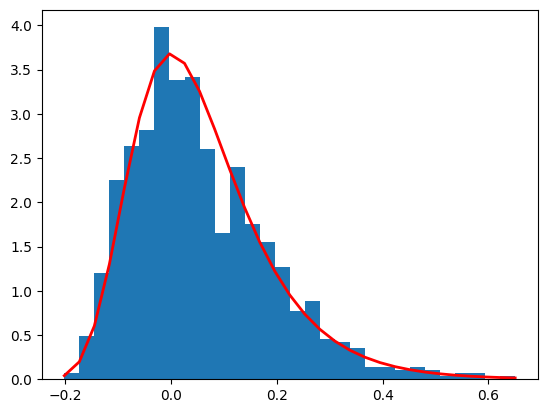

In [ ]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, (1/beta)*np.exp(-(bins - mu)/beta)
         * np.exp( -np.exp( -(bins - mu) /beta) ),
         linewidth=2, color='r')
plt.show()

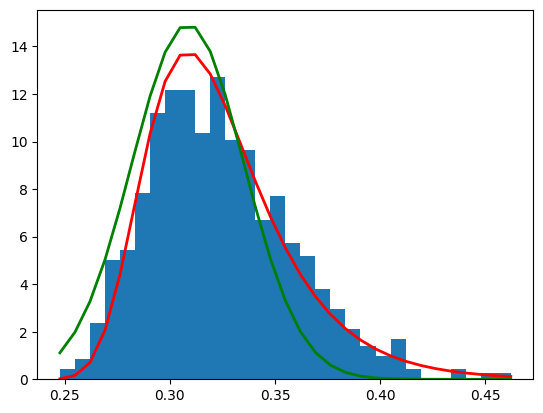

In [ ]:
means = []
maxima = []
for i in range(0,1000) :
   a = np.random.normal(mu, beta, 1000)
   means.append(a.mean())
   maxima.append(a.max())
count, bins, ignored = plt.hist(maxima, 30, density=True)
beta = np.std(maxima) * np.sqrt(6) / np.pi
mu = np.mean(maxima) - 0.57721*beta
plt.plot(bins, (1/beta)*np.exp(-(bins - mu)/beta)
         * np.exp(-np.exp(-(bins - mu)/beta)),
         linewidth=2, color='r')
plt.plot(bins, 1/(beta * np.sqrt(2 * np.pi))
         * np.exp(-(bins - mu)**2 / (2 * beta**2)),
         linewidth=2, color='g')
plt.show()

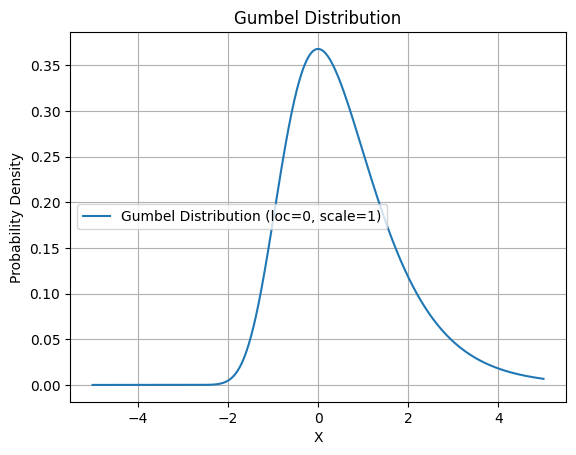

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Gumbel分布のパラメータを設定
location = 0  # 位置パラメータ
scale = 1     # 尺度パラメータ

# Gumbel分布の確率密度関数（Probability Density Function）を計算する範囲を定義
x = np.linspace(-5, 5, 1000)

# Gumbel分布の確率密度関数を計算
pdf = stats.gumbel_r.pdf(x, loc=location, scale=scale)

# 結果をプロット
plt.plot(x, pdf, label=f'Gumbel Distribution (loc={location}, scale={scale})')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Gumbel Distribution')
plt.legend()
plt.grid(True)
plt.show()


## pymc.HalfCauchy

In [ ]:
import numpy as np
from scipy.stats import halfcauchy
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

In [ ]:
mean, var, skew, kurt = halfcauchy.stats(moments='mvsk')

In [ ]:
x = np.linspace(halfcauchy.ppf(0.01),
                halfcauchy.ppf(0.99), 100)
ax.plot(x, halfcauchy.pdf(x),
       'r-', lw=5, alpha=0.6, label='halfcauchy pdf')

In [ ]:
rv = halfcauchy()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

In [ ]:
vals = halfcauchy.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], halfcauchy.cdf(vals))

True

In [ ]:
r = halfcauchy.rvs(size=1000)

In [ ]:
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

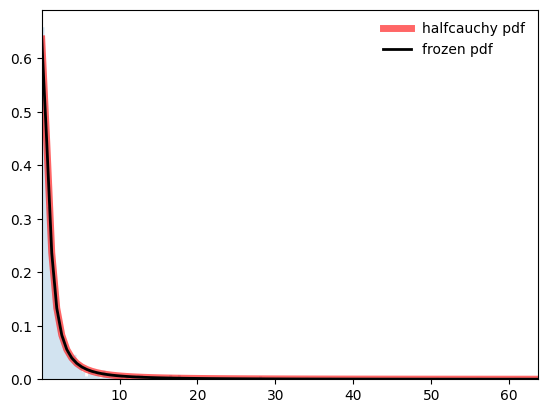

In [ ]:
fig

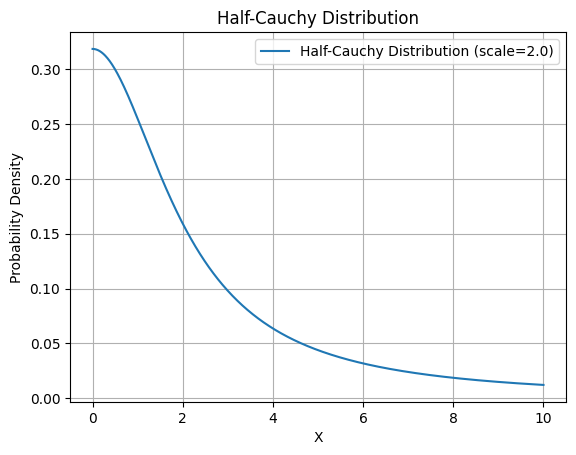

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Half-Cauchy分布の尺度パラメータを設定
scale = 2.0

# Half-Cauchy分布の確率密度関数（Probability Density Function）を計算する範囲を定義
x = np.linspace(0, 10, 1000)

# Half-Cauchy分布の確率密度関数を計算
pdf = stats.halfcauchy.pdf(x, scale=scale)

# 結果をプロット
plt.plot(x, pdf, label=f'Half-Cauchy Distribution (scale={scale})')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Half-Cauchy Distribution')
plt.legend()
plt.grid(True)
plt.show()


## pymc.HalfFlat

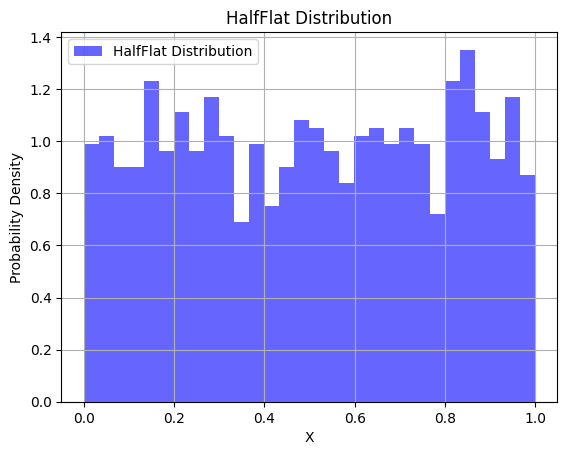

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# データの範囲を定義
lower_bound = 0.0
upper_bound = 1.0

# HalfFlat分布のランダムサンプルを生成
sample_size = 1000
half_flat_samples = np.random.uniform(lower_bound, upper_bound, sample_size)

# ヒストグラムをプロットして分布を可視化
plt.hist(half_flat_samples, bins=30, density=True, alpha=0.6, color='b', label='HalfFlat Distribution')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('HalfFlat Distribution')
plt.legend()
plt.grid(True)
plt.show()


## pymc.HalfNormal

In [ ]:
import numpy as np
from scipy.stats import halfnorm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

In [ ]:
mean, var, skew, kurt = halfnorm.stats(moments='mvsk')

In [ ]:
x = np.linspace(halfnorm.ppf(0.01),
                halfnorm.ppf(0.99), 100)
ax.plot(x, halfnorm.pdf(x),
       'r-', lw=5, alpha=0.6, label='halfnorm pdf')

In [ ]:
rv = halfnorm()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

In [ ]:
vals = halfnorm.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], halfnorm.cdf(vals))

True

In [ ]:
r = halfnorm.rvs(size=1000)

In [ ]:
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

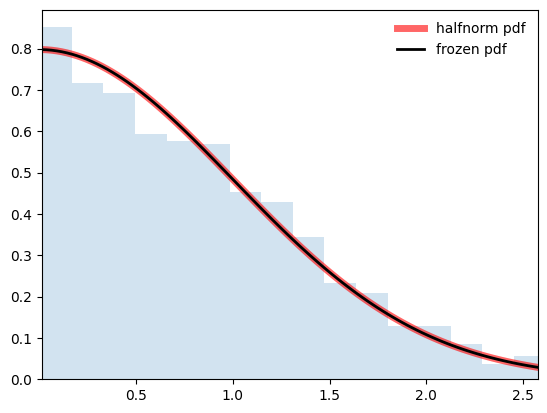

In [ ]:
fig

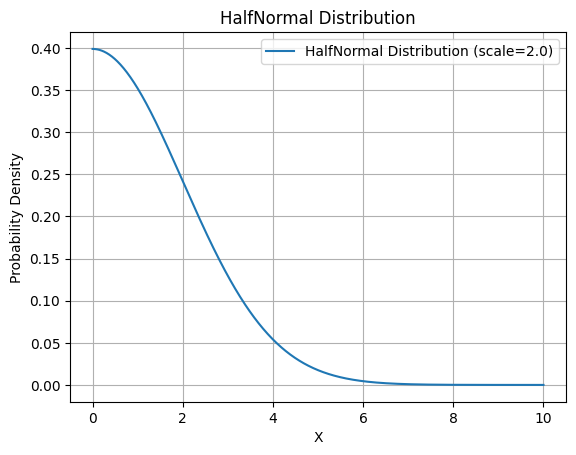

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# HalfNormal分布の尺度パラメータを設定
scale = 2.0

# HalfNormal分布の確率密度関数（Probability Density Function）を計算する範囲を定義
x = np.linspace(0, 10, 1000)

# HalfNormal分布の確率密度関数を計算
pdf = stats.halfnorm.pdf(x, scale=scale)

# 結果をプロット
plt.plot(x, pdf, label=f'HalfNormal Distribution (scale={scale})')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('HalfNormal Distribution')
plt.legend()
plt.grid(True)
plt.show()


## pymc.HalfStudentT

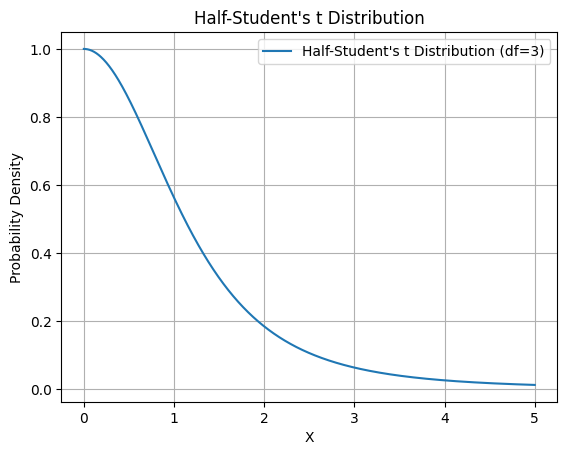

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Half-Student's t分布の自由度パラメータを設定
degrees_of_freedom = 3  # 自由度

# Half-Student's t分布の確率密度関数（Probability Density Function）を計算する範囲を定義
x = np.linspace(0, 5, 1000)

# Half-Student's t分布の確率密度関数を計算
pdf = stats.t.pdf(x, df=degrees_of_freedom)

# 半分の領域にする
pdf = pdf / np.max(pdf)

# 結果をプロット
plt.plot(x, pdf, label=f'Half-Student\'s t Distribution (df={degrees_of_freedom})')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Half-Student\'s t Distribution')
plt.legend()
plt.grid(True)
plt.show()


## pymc.Interpolated

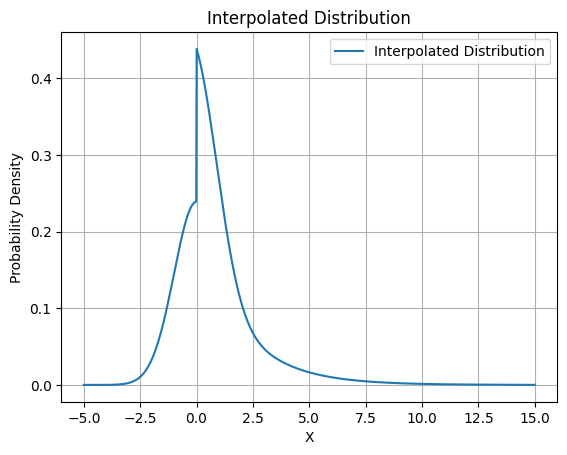

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 正規分布と指数分布を選択
normal_dist = stats.norm(loc=0, scale=1)
exponential_dist = stats.expon(scale=2)

# 重みを設定（どちらの分布をどれだけ含めるか）
weight_normal = 0.6
weight_exponential = 0.4

# ランダムサンプル生成用のデータポイントを作成
x = np.linspace(-5, 15, 1000)

# Interpolated分布を計算
interpolated_samples = (weight_normal * normal_dist.pdf(x)) + (weight_exponential * exponential_dist.pdf(x))

# 正規化（確率の合計を1にする）
interpolated_samples /= np.trapz(interpolated_samples, x)

# 結果をプロット
plt.plot(x, interpolated_samples, label=f'Interpolated Distribution')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Interpolated Distribution')
plt.legend()
plt.grid(True)
plt.show()


## pymc.InverseGamma

In [ ]:
import numpy as np
from scipy.stats import invgamma
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

In [ ]:
a = 4.07
mean, var, skew, kurt = invgamma.stats(a, moments='mvsk')

In [ ]:
x = np.linspace(invgamma.ppf(0.01, a),
                invgamma.ppf(0.99, a), 100)
ax.plot(x, invgamma.pdf(x, a),
       'r-', lw=5, alpha=0.6, label='invgamma pdf')

In [ ]:
rv = invgamma(a)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

In [ ]:
vals = invgamma.ppf([0.001, 0.5, 0.999], a)
np.allclose([0.001, 0.5, 0.999], invgamma.cdf(vals, a))

True

In [ ]:
r = invgamma.rvs(a, size=1000)

In [ ]:
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

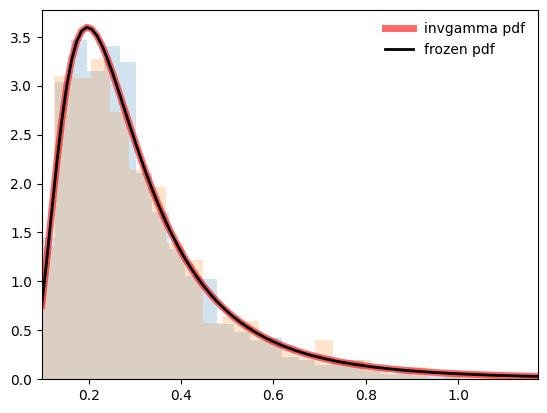

In [ ]:
fig

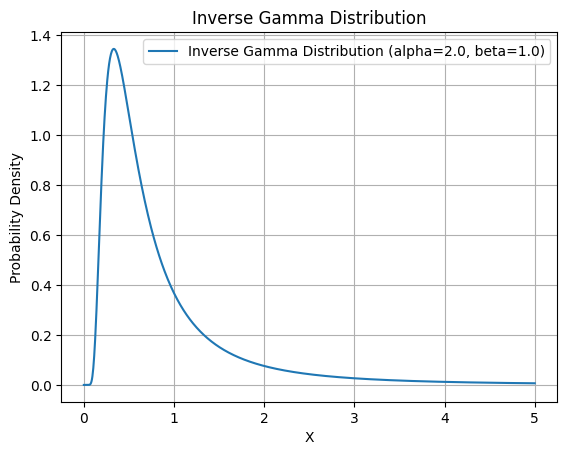

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Inverse Gamma分布のパラメータを設定
alpha = 2.0  # シェイプパラメータ
beta = 1.0   # スケールパラメータ

# Inverse Gamma分布の確率密度関数（Probability Density Function）を計算する範囲を定義
x = np.linspace(0.001, 5, 1000)  # 0にゼロ除算が発生しないように微小な値を含めます

# Inverse Gamma分布の確率密度関数を計算
pdf = stats.invgamma.pdf(x, a=alpha, scale=beta)

# 結果をプロット
plt.plot(x, pdf, label=f'Inverse Gamma Distribution (alpha={alpha}, beta={beta})')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Inverse Gamma Distribution')
plt.legend()
plt.grid(True)
plt.show()


## pymc.Kumaraswamy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kumaraswamy

# Kumaraswamy分布のパラメータを設定
a = 2.0
b = 3.0

# Kumaraswamy分布の確率密度関数を計算する範囲を定義
x = np.linspace(0, 1, 1000)

# Kumaraswamy分布の確率密度関数を計算
pdf = kumaraswamy.pdf(x, a, b)

# 結果をプロット
plt.plot(x, pdf, label=f'Kumaraswamy Distribution (a={a}, b={b})')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Kumaraswamy Distribution')
plt.legend()
plt.grid(True)
plt.show()

ImportError: ignored

## pymc.Laplace

In [ ]:
loc, scale = 0., 1.
s = np.random.laplace(loc, scale, 1000)

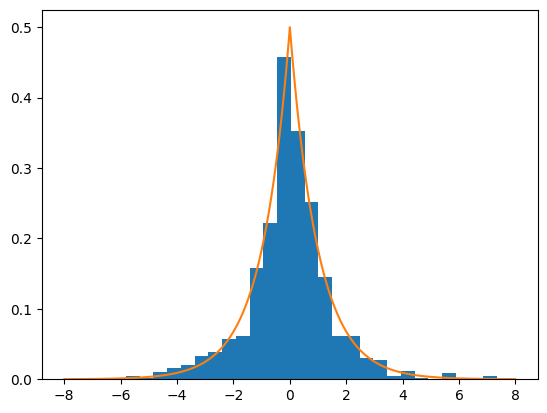

In [ ]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, density=True)
x = np.arange(-8., 8., .01)
pdf = np.exp(-abs(x-loc)/scale)/(2.*scale)
plt.plot(x, pdf)

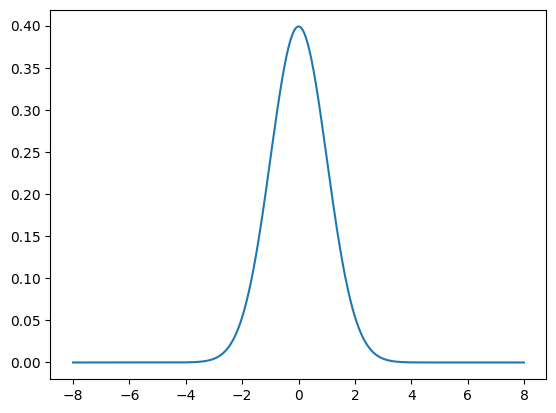

In [ ]:
g = (1/(scale * np.sqrt(2 * np.pi)) *
     np.exp(-(x - loc)**2 / (2 * scale**2)))
plt.plot(x,g)

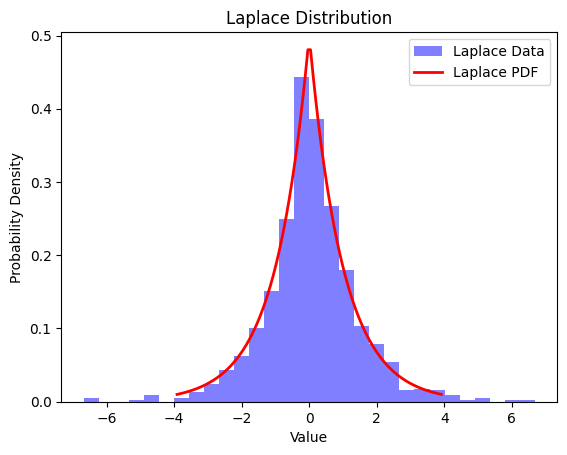

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import laplace

# Laplace parameters
loc = 0.0  # Location parameter (median)
scale = 1.0     # Scale parameter (half of the interquartile range)

# Generate random data from Laplace distribution
data = laplace.rvs(loc=loc, scale=scale, size=1000)

# Plot the histogram of the generated data
plt.hist(data, bins=30, density=True, alpha=0.5, color='b', label='Laplace Data')

# Calculate and plot the probability density function (PDF)
x = np.linspace(laplace.ppf(0.01, loc=loc, scale=scale), laplace.ppf(0.99, loc=loc, scale=scale), 100)
pdf = laplace.pdf(x, loc=loc, scale=scale)
plt.plot(x, pdf, 'r-', lw=2, label='Laplace PDF')

# Add labels and legend to the plot
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.title('Laplace Distribution')
plt.show()


## pymc.Logistic

In [ ]:
import numpy as np
from scipy.stats import logistic
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

In [ ]:
mean, var, skew, kurt = logistic.stats(moments='mvsk')

In [ ]:
x = np.linspace(logistic.ppf(0.01),
                logistic.ppf(0.99), 100)
ax.plot(x, logistic.pdf(x),
       'r-', lw=5, alpha=0.6, label='logistic pdf')

In [ ]:
rv = logistic()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

In [ ]:
vals = logistic.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], logistic.cdf(vals))

True

In [ ]:
r = logistic.rvs(size=1000)

In [ ]:
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

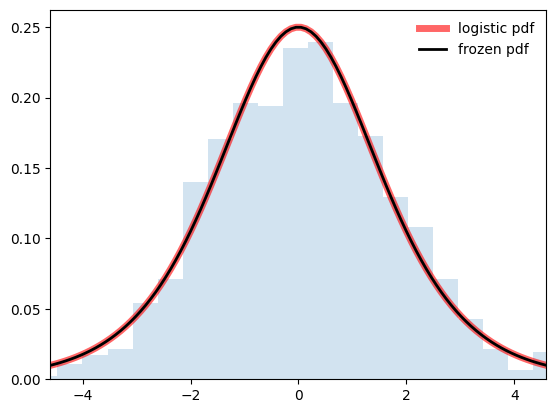

In [ ]:
fig

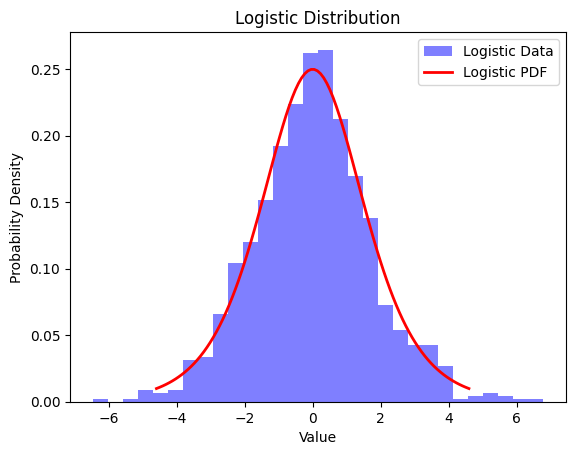

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import logistic

# Logistic parameters
loc = 0.0  # Location parameter (mean)
scale = 1.0     # Scale parameter (standard deviation)

# Generate random data from Logistic distribution
data = logistic.rvs(loc=loc, scale=scale, size=1000)

# Plot the histogram of the generated data
plt.hist(data, bins=30, density=True, alpha=0.5, color='b', label='Logistic Data')

# Calculate and plot the probability density function (PDF)
x = np.linspace(logistic.ppf(0.01, loc=loc, scale=scale), logistic.ppf(0.99, loc=loc, scale=scale), 100)
pdf = logistic.pdf(x, loc=loc, scale=scale)
plt.plot(x, pdf, 'r-', lw=2, label='Logistic PDF')

# Add labels and legend to the plot
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.title('Logistic Distribution')
plt.show()


## pymc.LogitNormal

<ipython-input-137-73249b2998bc>:19: RuntimeWarning: divide by zero encountered in divide
  pdf = norm.pdf(np.log(x / (1 - x)), loc=mu, scale=sigma) / (x * (1 - x))
<ipython-input-137-73249b2998bc>:19: RuntimeWarning: divide by zero encountered in log
  pdf = norm.pdf(np.log(x / (1 - x)), loc=mu, scale=sigma) / (x * (1 - x))
<ipython-input-137-73249b2998bc>:19: RuntimeWarning: invalid value encountered in divide
  pdf = norm.pdf(np.log(x / (1 - x)), loc=mu, scale=sigma) / (x * (1 - x))


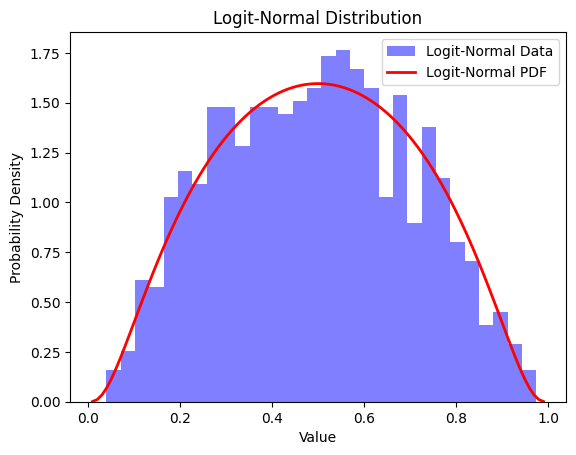

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Logit-Normal parameters
mu = 0.0  # Mean of the underlying normal distribution
sigma = 1.0  # Standard deviation of the underlying normal distribution

# Generate random data from Logit-Normal distribution
n = 1000  # Number of samples
normal_data = np.random.normal(mu, sigma, n)
logit_normal_data = 1 / (1 + np.exp(-normal_data))

# Plot the histogram of the generated data
plt.hist(logit_normal_data, bins=30, density=True, alpha=0.5, color='b', label='Logit-Normal Data')

# Calculate and plot the probability density function (PDF)
x = np.linspace(0, 1, 100)
pdf = norm.pdf(np.log(x / (1 - x)), loc=mu, scale=sigma) / (x * (1 - x))
plt.plot(x, pdf, 'r-', lw=2, label='Logit-Normal PDF')

# Add labels and legend to the plot
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.title('Logit-Normal Distribution')
plt.show()


## pymc.LogNormal

In [ ]:
mu, sigma = 3., 1. # mean and standard deviation
s = np.random.lognormal(mu, sigma, 1000)

In [ ]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 100, density=True, align='mid')

In [ ]:
x = np.linspace(min(bins), max(bins), 10000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))
       / (x * sigma * np.sqrt(2 * np.pi)))

In [ ]:
plt.plot(x, pdf, linewidth=2, color='r')
plt.axis('tight')
plt.show()

In [ ]:
# Generate a thousand samples: each is the product of 100 random
# values, drawn from a normal distribution.
b = []
for i in range(1000):
   a = 10. + np.random.standard_normal(100)
   b.append(np.prod(a))

In [ ]:
b = np.array(b) / np.min(b) # scale values to be positive
count, bins, ignored = plt.hist(b, 100, density=True, align='mid')
sigma = np.std(np.log(b))
mu = np.mean(np.log(b))

In [ ]:
x = np.linspace(min(bins), max(bins), 10000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))
       / (x * sigma * np.sqrt(2 * np.pi)))

In [ ]:
plt.plot(x, pdf, color='r', linewidth=2)
plt.show()

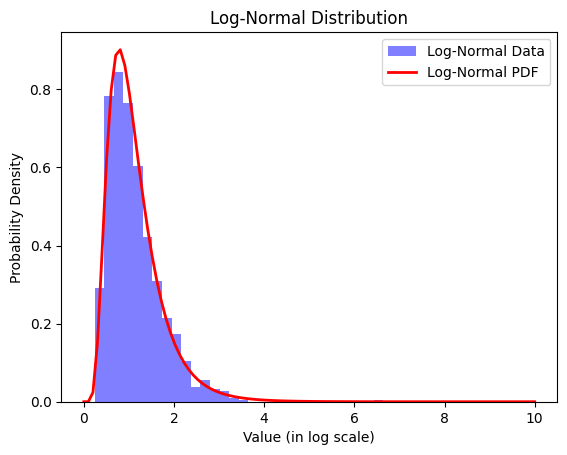

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Log-Normal parameters
mu = 0.0  # Mean of the underlying normal distribution in log space
sigma = 0.5  # Standard deviation of the underlying normal distribution in log space

# Generate random data from Log-Normal distribution
data = lognorm.rvs(s=sigma, loc=0, scale=np.exp(mu), size=1000)

# Plot the histogram of the generated data
plt.hist(data, bins=30, density=True, alpha=0.5, color='b', label='Log-Normal Data')

# Calculate and plot the probability density function (PDF)
x = np.linspace(0, 10, 100)
pdf = lognorm.pdf(x, s=sigma, loc=0, scale=np.exp(mu))
plt.plot(x, pdf, 'r-', lw=2, label='Log-Normal PDF')

# Add labels and legend to the plot
plt.xlabel('Value (in log scale)')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.title('Log-Normal Distribution')
plt.show()


## pymc.Moyal

In [ ]:
import numpy as np
from scipy.stats import moyal
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

In [ ]:
mean, var, skew, kurt = moyal.stats(moments='mvsk')

In [ ]:
x = np.linspace(moyal.ppf(0.01),
                moyal.ppf(0.99), 100)
ax.plot(x, moyal.pdf(x),
       'r-', lw=5, alpha=0.6, label='moyal pdf')

In [ ]:
rv = moyal()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

In [ ]:
vals = moyal.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], moyal.cdf(vals))

True

In [ ]:
r = moyal.rvs(size=1000)

In [ ]:
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

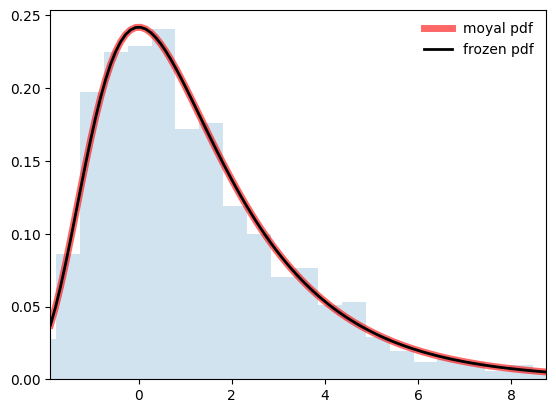

In [ ]:
fig

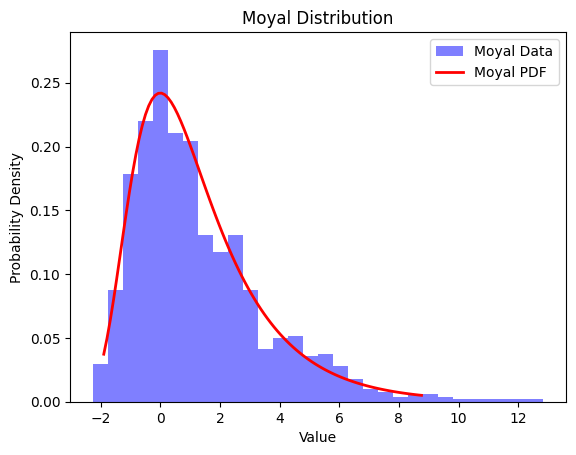

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import moyal

# Moyal parameters
loc = 0.0  # Location parameter (mode)
scale = 1.0  # Scale parameter

# Generate random data from Moyal distribution
data = moyal.rvs(loc=loc, scale=scale, size=1000)

# Plot the histogram of the generated data
plt.hist(data, bins=30, density=True, alpha=0.5, color='b', label='Moyal Data')

# Calculate and plot the probability density function (PDF)
x = np.linspace(moyal.ppf(0.01, loc=loc, scale=scale), moyal.ppf(0.99, loc=loc, scale=scale), 100)
pdf = moyal.pdf(x, loc=loc, scale=scale)
plt.plot(x, pdf, 'r-', lw=2, label='Moyal PDF')

# Add labels and legend to the plot
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.title('Moyal Distribution')
plt.show()

## pymc.Normal

(array([  2.,   5.,  40., 125., 213., 270., 203.,  97.,  37.,   8.]),
 array([-3.72527896, -3.03055228, -2.3358256 , -1.64109893, -0.94637225,
        -0.25164557,  0.4430811 ,  1.13780778,  1.83253446,  2.52726113,
         3.22198781]),
 <a list of 10 Patch objects>)

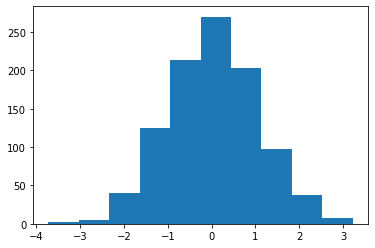

In [ ]:
# ガウス分布を定義
normal_dist = stats.norm(0.0, 1.0)

# 定義したガウス分布から1000個のサンプルを生成
X = normal_dist.rvs(1000)

# ヒストグラムを描く
plt.hist(X, bins=10)

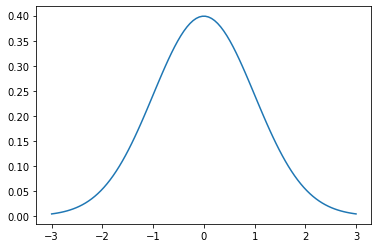

In [ ]:
ls = np.linspace(-3, 3, 100)
plt.plot(ls, normal_dist.pdf(ls))

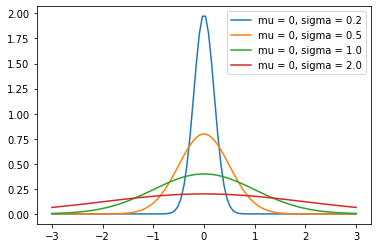

In [ ]:
# 標準偏差を変えてガウス分布をプロットしてみる
mu = 0
sigma_list = [0.2, 0.5, 1.0, 2.0]
for sigma in sigma_list:
  normal_dist = stats.norm(mu, sigma)
  plt.plot(ls, normal_dist.pdf(ls),
           label='mu = ' + str(mu) + ', sigma = ' + str(sigma))
plt.legend()

In [ ]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

In [ ]:
abs(mu - np.mean(s))

0.0028343264752245306

In [ ]:
abs(sigma - np.std(s, ddof=1))

2.4804805300787658e-05

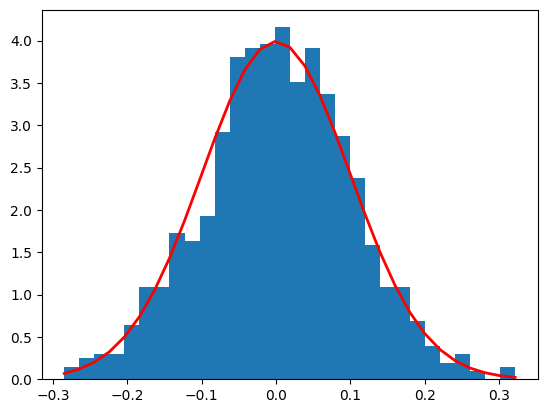

In [ ]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

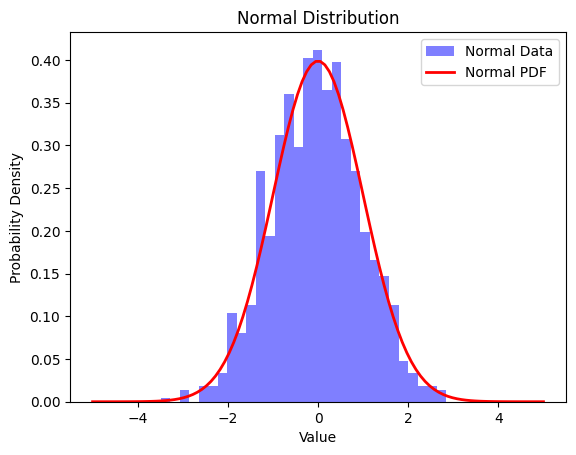

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Normal parameters
mu = 0.0  # Mean
sigma = 1.0  # Standard deviation

# Generate random data from Normal distribution
data = np.random.normal(mu, sigma, 1000)

# Plot the histogram of the generated data
plt.hist(data, bins=30, density=True, alpha=0.5, color='b', label='Normal Data')

# Calculate and plot the probability density function (PDF)
x = np.linspace(-5, 5, 100)
pdf = norm.pdf(x, mu, sigma)
plt.plot(x, pdf, 'r-', lw=2, label='Normal PDF')

# Add labels and legend to the plot
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.title('Normal Distribution')
plt.show()


## pymc.Pareto

In [ ]:
import numpy as np
from scipy.stats import pareto
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

In [ ]:
b = 2.62
mean, var, skew, kurt = pareto.stats(b, moments='mvsk')

In [ ]:
x = np.linspace(pareto.ppf(0.01, b),
                pareto.ppf(0.99, b), 100)
ax.plot(x, pareto.pdf(x, b),
       'r-', lw=5, alpha=0.6, label='pareto pdf')

In [ ]:
rv = pareto(b)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

In [ ]:
vals = pareto.ppf([0.001, 0.5, 0.999], b)
np.allclose([0.001, 0.5, 0.999], pareto.cdf(vals, b))

True

In [ ]:
r = pareto.rvs(b, size=1000)

In [ ]:
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

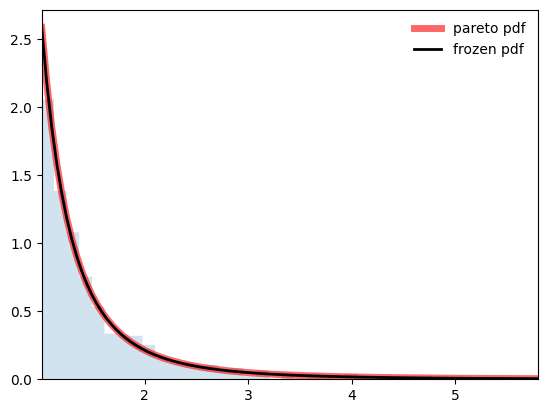

In [ ]:
fig

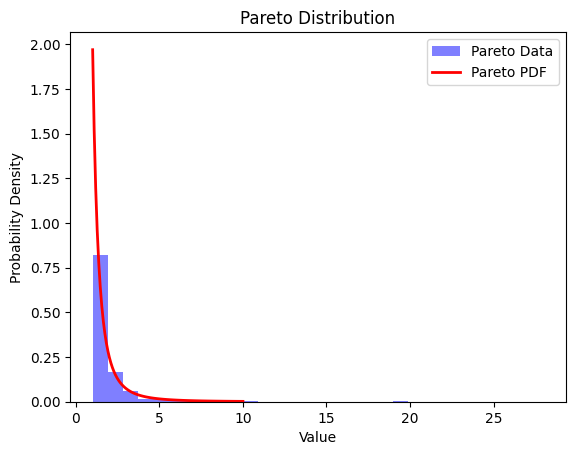

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto

# Pareto parameters
alpha = 2.0  # Shape parameter
xmin = 1.0   # Minimum value parameter

# Generate random data from Pareto distribution
data = pareto.rvs(alpha, loc=0, scale=xmin, size=1000)

# Plot the histogram of the generated data
plt.hist(data, bins=30, density=True, alpha=0.5, color='b', label='Pareto Data')

# Calculate and plot the probability density function (PDF)
x = np.linspace(pareto.ppf(0.01, alpha, loc=0, scale=xmin), pareto.ppf(0.99, alpha, loc=0, scale=xmin), 100)
pdf = pareto.pdf(x, alpha, loc=0, scale=xmin)
plt.plot(x, pdf, 'r-', lw=2, label='Pareto PDF')

# Add labels and legend to the plot
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.title('Pareto Distribution')
plt.show()


## pymc.PolyaGamma

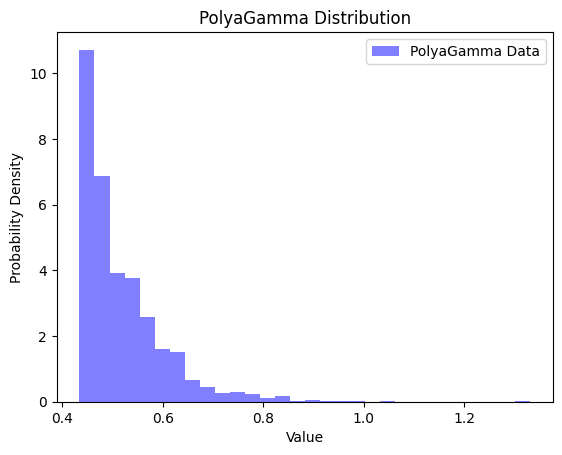

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import polygamma
from scipy.stats import uniform

# PolyaGamma parameters
shape = 5  # Shape parameter (can be adjusted)
scale = 1  # Scale parameter (can be adjusted)
size = 1000  # Number of samples

# Generate random data from PolyaGamma distribution
# Using the inverse transform sampling method
uniform_samples = uniform.rvs(size=size)
pg_samples = -0.5 * np.log(uniform_samples) / (2 * np.pi * scale) + 0.5 * shape * polygamma(1, 0.25 * shape * shape)

# Plot the histogram of the generated data
plt.hist(pg_samples, bins=30, density=True, alpha=0.5, color='b', label='PolyaGamma Data')

# You can calculate and plot the PDF if you have access to the PolyaGamma PDF formula.

# Add labels and legend to the plot
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.title('PolyaGamma Distribution')
plt.show()


## pymc.Rice

In [ ]:
import numpy as np
from scipy.stats import rice
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

In [ ]:
b = 0.775
mean, var, skew, kurt = rice.stats(b, moments='mvsk')

In [ ]:
x = np.linspace(rice.ppf(0.01, b),
                rice.ppf(0.99, b), 100)
ax.plot(x, rice.pdf(x, b),
       'r-', lw=5, alpha=0.6, label='rice pdf')

In [ ]:
rv = rice(b)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

In [ ]:
vals = rice.ppf([0.001, 0.5, 0.999], b)
np.allclose([0.001, 0.5, 0.999], rice.cdf(vals, b))

True

In [ ]:
r = rice.rvs(b, size=1000)

In [ ]:
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

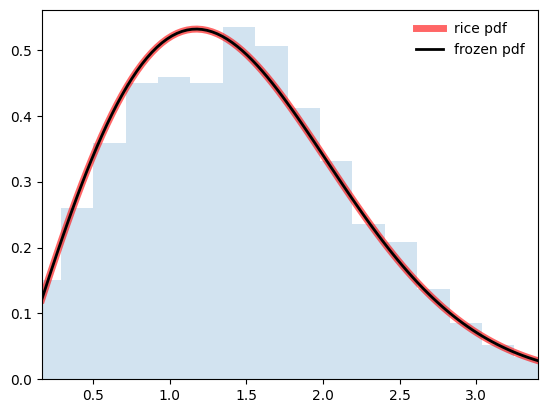

In [ ]:
fig

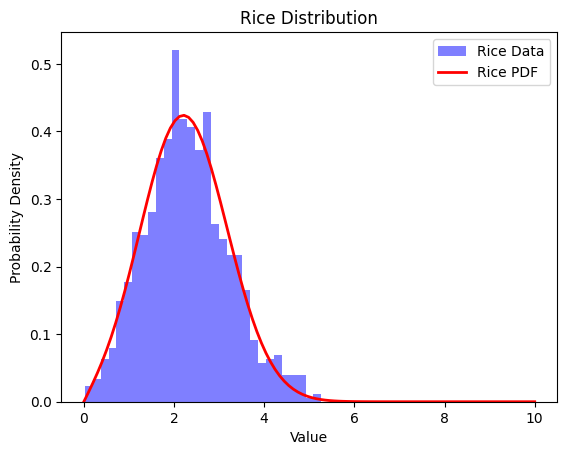

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rice

# Rice parameters
r = 2.0  # Scale parameter (noncentrality parameter)
sigma = 1.0  # Scale parameter (standard deviation)
size = 1000  # Number of samples

# Generate random data from Rice distribution
data = rice.rvs(r, scale=sigma, size=size)

# Plot the histogram of the generated data
plt.hist(data, bins=30, density=True, alpha=0.5, color='b', label='Rice Data')

# Calculate and plot the probability density function (PDF)
x = np.linspace(0, 10, 100)
pdf = rice.pdf(x, r, scale=sigma)
plt.plot(x, pdf, 'r-', lw=2, label='Rice PDF')

# Add labels and legend to the plot
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.title('Rice Distribution')
plt.show()


## pymc.SkewNormal

In [ ]:
import numpy as np
from scipy.stats import skewnorm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

In [ ]:
a = 4
mean, var, skew, kurt = skewnorm.stats(a, moments='mvsk')

In [ ]:
x = np.linspace(skewnorm.ppf(0.01, a),
                skewnorm.ppf(0.99, a), 100)
ax.plot(x, skewnorm.pdf(x, a),
       'r-', lw=5, alpha=0.6, label='skewnorm pdf')

In [ ]:
rv = skewnorm(a)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

In [ ]:
vals = skewnorm.ppf([0.001, 0.5, 0.999], a)
np.allclose([0.001, 0.5, 0.999], skewnorm.cdf(vals, a))

True

In [ ]:
r = skewnorm.rvs(a, size=1000)

In [ ]:
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

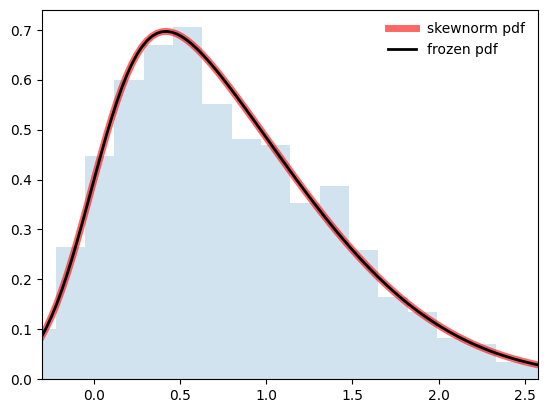

In [ ]:
fig

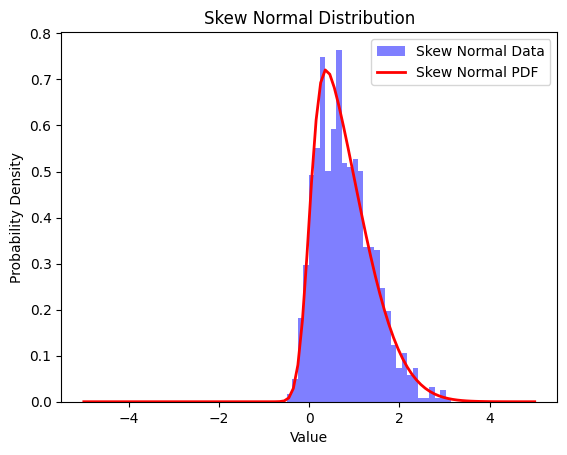

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

# Skew Normal parameters
a = 5.0  # Skewness parameter (can be adjusted)
loc = 0.0  # Mean
scale = 1.0  # Standard deviation

# Generate random data from Skew Normal distribution
data = skewnorm.rvs(a, loc=loc, scale=scale, size=1000)

# Plot the histogram of the generated data
plt.hist(data, bins=30, density=True, alpha=0.5, color='b', label='Skew Normal Data')

# Calculate and plot the probability density function (PDF)
x = np.linspace(-5, 5, 100)
pdf = skewnorm.pdf(x, a, loc=loc, scale=scale)
plt.plot(x, pdf, 'r-', lw=2, label='Skew Normal PDF')

# Add labels and legend to the plot
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.title('Skew Normal Distribution')
plt.show()


## pymc.StudentT

In [ ]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

In [ ]:
df = 2.74
mean, var, skew, kurt = t.stats(df, moments='mvsk')

In [ ]:
x = np.linspace(t.ppf(0.01, df),
                t.ppf(0.99, df), 100)
ax.plot(x, t.pdf(x, df),
       'r-', lw=5, alpha=0.6, label='t pdf')

In [ ]:
rv = t(df)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

In [ ]:
vals = t.ppf([0.001, 0.5, 0.999], df)
np.allclose([0.001, 0.5, 0.999], t.cdf(vals, df))

True

In [ ]:
r = t.rvs(df, size=1000)

In [ ]:
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

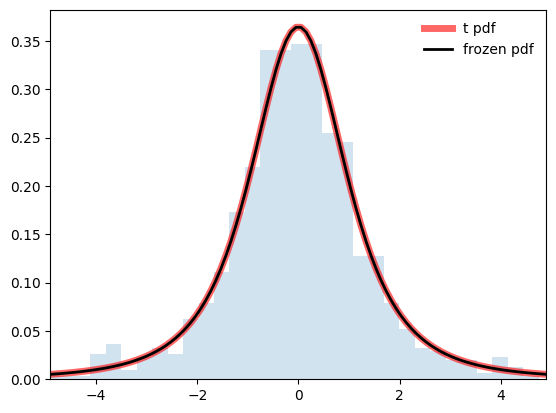

In [ ]:
fig

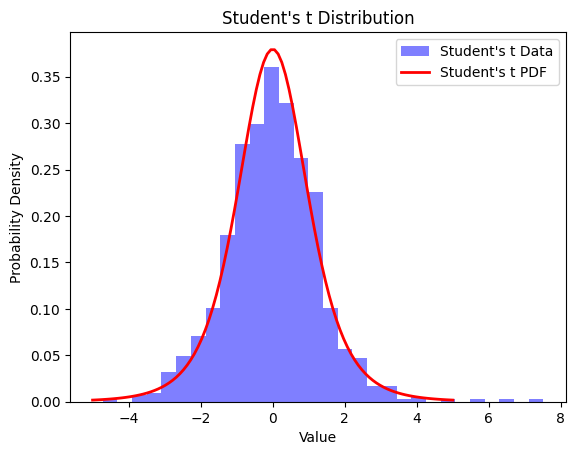

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Student's t parameters
df = 5  # Degrees of freedom (can be adjusted)
loc = 0.0  # Mean
scale = 1.0  # Scale parameter (standard deviation)

# Generate random data from Student's t distribution
data = t.rvs(df, loc=loc, scale=scale, size=1000)

# Plot the histogram of the generated data
plt.hist(data, bins=30, density=True, alpha=0.5, color='b', label="Student's t Data")

# Calculate and plot the probability density function (PDF)
x = np.linspace(-5, 5, 100)
pdf = t.pdf(x, df, loc=loc, scale=scale)
plt.plot(x, pdf, 'r-', lw=2, label="Student's t PDF")

# Add labels and legend to the plot
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.title("Student's t Distribution")
plt.show()


## pymc.Triangular

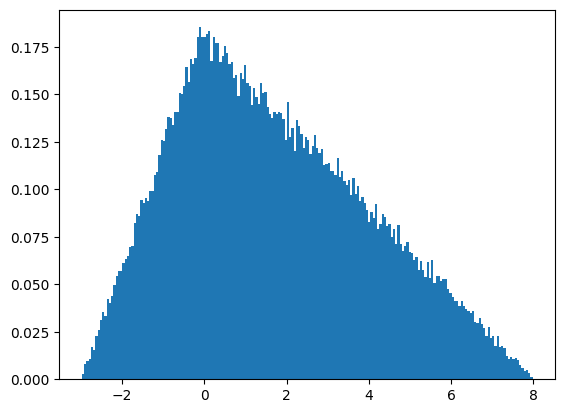

In [ ]:
import matplotlib.pyplot as plt
h = plt.hist(np.random.triangular(-3, 0, 8, 100000), bins=200,
             density=True)
plt.show()

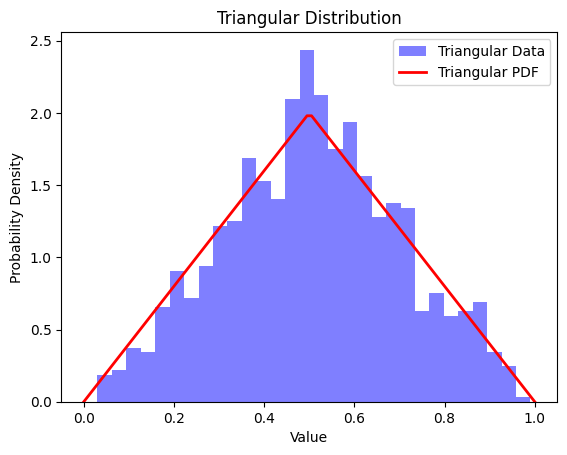

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import triang

# Triangular parameters
c = 0.5  # Mode (peak) of the distribution (can be adjusted)
loc = 0.0  # Lower bound of the range
scale = 1.0  # Upper bound of the range

# Generate random data from Triangular distribution
data = triang.rvs(c=c, loc=loc, scale=scale, size=1000)

# Plot the histogram of the generated data
plt.hist(data, bins=30, density=True, alpha=0.5, color='b', label='Triangular Data')

# Calculate and plot the probability density function (PDF)
x = np.linspace(loc, scale, 100)
pdf = triang.pdf(x, c=c, loc=loc, scale=scale)
plt.plot(x, pdf, 'r-', lw=2, label='Triangular PDF')

# Add labels and legend to the plot
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.title('Triangular Distribution')
plt.show()


## pymc.TruncatedNormal

In [ ]:
import numpy as np
from scipy.stats import truncnorm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

In [ ]:
a, b = 0.1, 2
mean, var, skew, kurt = truncnorm.stats(a, b, moments='mvsk')

In [ ]:
x = np.linspace(truncnorm.ppf(0.01, a, b),
                truncnorm.ppf(0.99, a, b), 100)
ax.plot(x, truncnorm.pdf(x, a, b),
       'r-', lw=5, alpha=0.6, label='truncnorm pdf')

In [ ]:
rv = truncnorm(a, b)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

In [ ]:
vals = truncnorm.ppf([0.001, 0.5, 0.999], a, b)
np.allclose([0.001, 0.5, 0.999], truncnorm.cdf(vals, a, b))

True

In [ ]:
r = truncnorm.rvs(a, b, size=1000)

In [ ]:
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

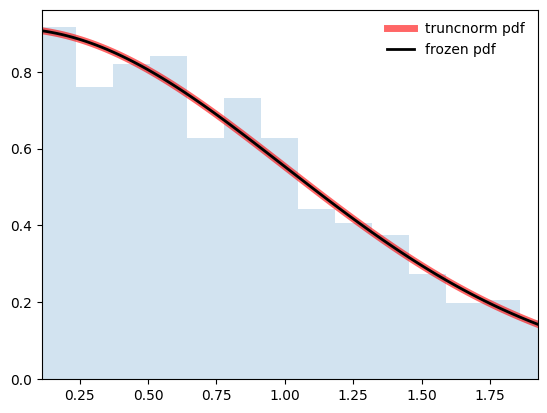

In [ ]:
fig

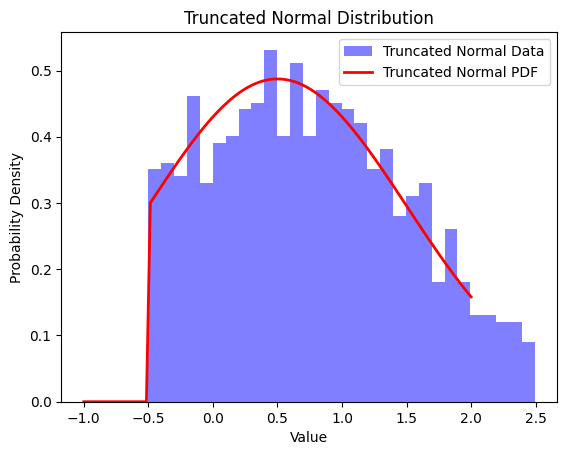

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

# Truncated Normal parameters
a = -1.0  # Lower bound of the range
b = 2.0   # Upper bound of the range
loc = 0.5  # Mean
scale = 1.0  # Standard deviation

# Generate random data from Truncated Normal distribution
data = truncnorm.rvs(a, b, loc=loc, scale=scale, size=1000)

# Plot the histogram of the generated data
plt.hist(data, bins=30, density=True, alpha=0.5, color='b', label='Truncated Normal Data')

# Calculate and plot the probability density function (PDF)
x = np.linspace(a, b, 100)
pdf = truncnorm.pdf(x, a, b, loc=loc, scale=scale)
plt.plot(x, pdf, 'r-', lw=2, label='Truncated Normal PDF')

# Add labels and legend to the plot
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.title('Truncated Normal Distribution')
plt.show()


## pymc.Uniform

In [ ]:
uni_dist = stats.uniform(2, 5-2)

# 定義した一様分布から100個のサンプルを生成
X = uni_dist.rvs(100)
X

array([4.34455846, 3.83257645, 2.48147659, 2.71531524, 2.65845152,
       2.69340677, 2.2195604 , 3.78456773, 2.46294905, 2.27507176,
       4.9583356 , 2.32008692, 3.35565083, 4.08087198, 2.76574365,
       4.97312546, 4.13164588, 4.97009645, 2.89850556, 4.23873433,
       3.43839864, 3.70050669, 2.44363466, 3.15528433, 4.58241957,
       2.01298939, 3.36923892, 4.27671513, 2.02174194, 3.16829641,
       3.77174077, 3.51396715, 2.52307328, 3.06595578, 4.00203272,
       2.90918669, 2.84732043, 2.17472961, 3.98809746, 2.32492952,
       4.45867219, 3.44049376, 4.04736341, 4.75368719, 2.81455153,
       4.88948928, 4.83572617, 4.87086876, 3.22292688, 4.10957388,
       2.64976629, 2.4733697 , 2.12711294, 4.23524359, 4.22265254,
       4.87036772, 4.45762185, 2.77125307, 4.5293538 , 3.02081193,
       2.82669745, 4.56555938, 2.05949163, 4.4613897 , 4.23962676,
       2.24036864, 4.37260485, 3.53736516, 2.54532879, 2.66911319,
       3.84543211, 4.35569945, 2.76605894, 4.21816902, 2.46268

(array([12., 11., 15.,  7.,  6.,  8.,  9., 14.,  9.,  9.]),
 array([2.01298939, 2.309003  , 2.60501661, 2.90103021, 3.19704382,
        3.49305743, 3.78907103, 4.08508464, 4.38109825, 4.67711186,
        4.97312546]),
 <a list of 10 Patch objects>)

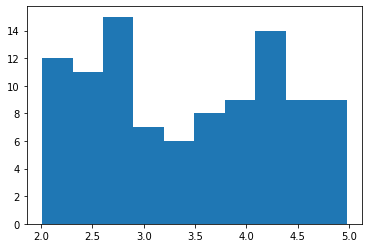

In [ ]:
plt.hist(X, bins=10)

In [ ]:
x = np.float32(5*0.99999999)
x

5.0

In [ ]:
s = np.random.uniform(-1,0,1000)

In [ ]:
np.all(s >= -1)

True

In [ ]:
np.all(s < 0)

True

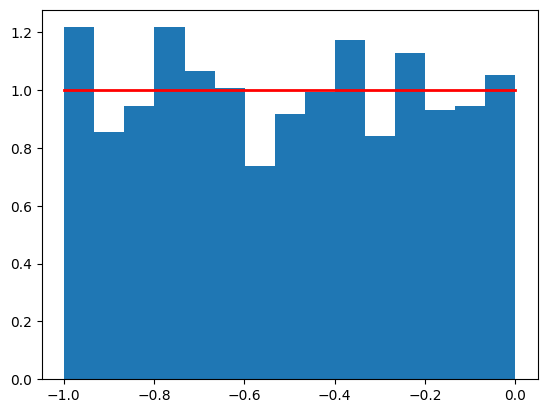

In [ ]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

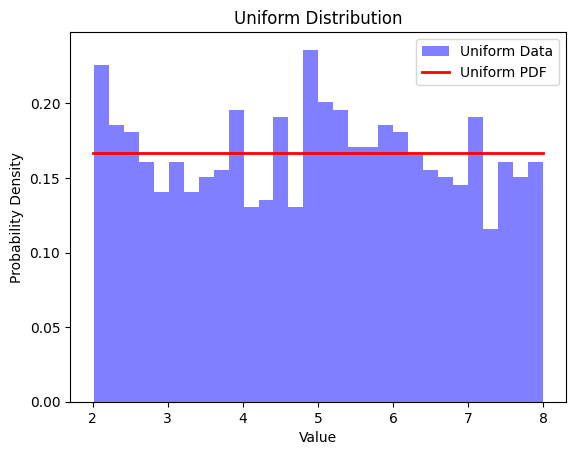

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

# Uniform parameters
a = 2.0  # Lower bound of the range
b = 8.0  # Upper bound of the range

# Generate random data from Uniform distribution
data = uniform.rvs(loc=a, scale=b-a, size=1000)

# Plot the histogram of the generated data
plt.hist(data, bins=30, density=True, alpha=0.5, color='b', label='Uniform Data')

# Calculate and plot the probability density function (PDF)
x = np.linspace(a, b, 100)
pdf = uniform.pdf(x, loc=a, scale=b-a)
plt.plot(x, pdf, 'r-', lw=2, label='Uniform PDF')

# Add labels and legend to the plot
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.title('Uniform Distribution')
plt.show()


## pymc.VonMises

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import vonmises

In [ ]:
loc = 0.5 * np.pi  # circular mean
kappa = 1  # concentration

In [ ]:
vonmises.pdf(loc, kappa, 0)

0.12570826359722018

In [ ]:
x = 1
cdf_value = vonmises.cdf(loc=loc, kappa=kappa, x=x)
ppf_value = vonmises.ppf(cdf_value, loc=loc, kappa=kappa)
x, cdf_value, ppf_value

(1, 0.31489339900904967, 1.0000000000000007)

In [ ]:
number_of_samples = 1000
samples = vonmises(loc=loc, kappa=kappa).rvs(number_of_samples)

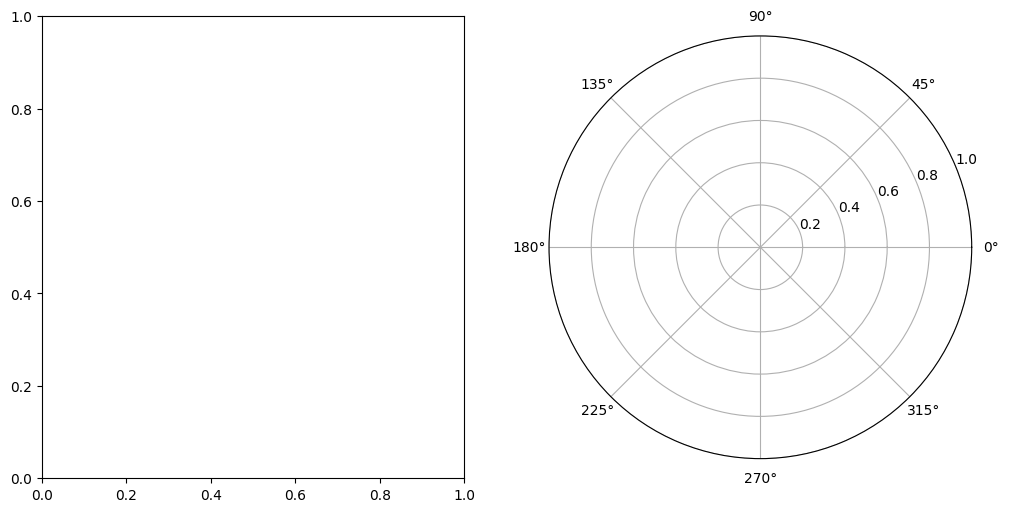

In [ ]:
fig = plt.figure(figsize=(12, 6))
left = plt.subplot(121)
right = plt.subplot(122, projection='polar')
x = np.linspace(-np.pi, np.pi, 500)
vonmises_pdf = vonmises.pdf(loc, kappa, x)
ticks = [0, 0.15, 0.3]

In [ ]:
left.plot(x, vonmises_pdf)
left.set_yticks(ticks)
number_of_bins = int(np.sqrt(number_of_samples))
left.hist(samples, density=True, bins=number_of_bins)
left.set_title("Cartesian plot")
left.set_xlim(-np.pi, np.pi)
left.grid(True)

In [ ]:
right.plot(x, vonmises_pdf, label="PDF")
right.set_yticks(ticks)
right.hist(samples, density=True, bins=number_of_bins,
           label="Histogram")
right.set_title("Polar plot")
right.legend(bbox_to_anchor=(0.15, 1.06))

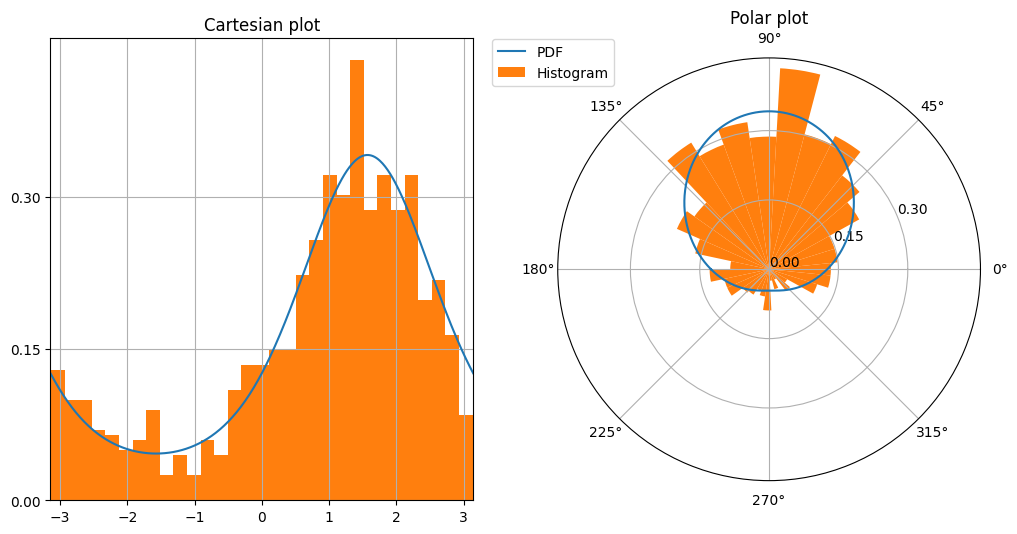

In [ ]:
fig

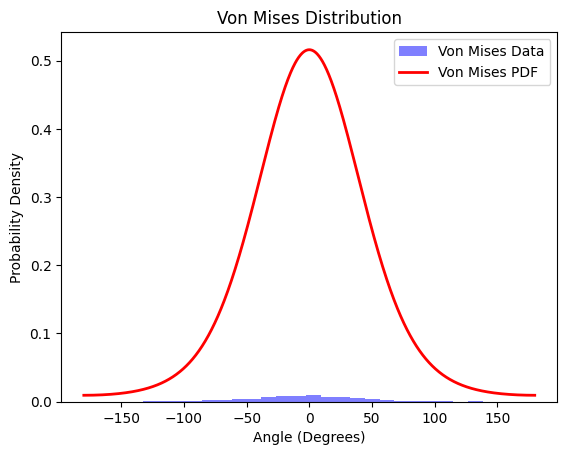

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import vonmises

# Von Mises parameters
mu = 0.0  # Mean direction (can be adjusted)
kappa = 2.0  # Concentration parameter (controls the spread, can be adjusted)

# Generate random data from Von Mises distribution
data = vonmises.rvs(loc=mu, kappa=kappa, size=1000)

# Convert angles from radians to degrees for plotting
data_degrees = np.degrees(data)

# Plot the histogram of the generated data
plt.hist(data_degrees, bins=30, density=True, alpha=0.5, color='b', label='Von Mises Data')

# Calculate and plot the probability density function (PDF)
x = np.linspace(-180, 180, 1000)
pdf = vonmises.pdf(np.radians(x), loc=mu, kappa=kappa)
plt.plot(x, pdf, 'r-', lw=2, label='Von Mises PDF')

# Add labels and legend to the plot
plt.xlabel('Angle (Degrees)')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.title('Von Mises Distribution')
plt.show()


## pymc.Wald

In [ ]:
import numpy as np
from scipy.stats import wald
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

In [ ]:
mean, var, skew, kurt = wald.stats(moments='mvsk')

In [ ]:
x = np.linspace(wald.ppf(0.01),
                wald.ppf(0.99), 100)
ax.plot(x, wald.pdf(x),
       'r-', lw=5, alpha=0.6, label='wald pdf')

In [ ]:
rv = wald()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

In [ ]:
vals = wald.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], wald.cdf(vals))

True

In [ ]:
r = wald.rvs(size=1000)

In [ ]:
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

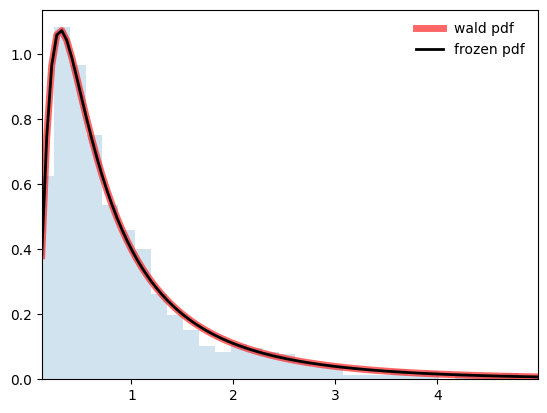

In [ ]:
fig

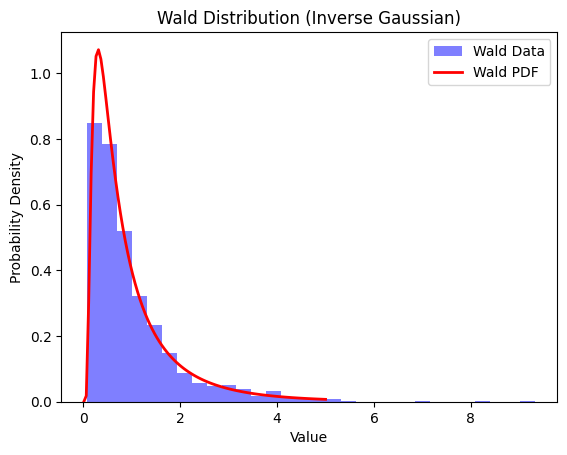

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import invgauss

# Wald parameters
mu = 1.0  # Mean
scale = 1.0  # Scale parameter (can be adjusted)
size = 1000  # Number of samples

# Generate random data from Wald distribution
data = invgauss.rvs(mu, scale=scale, size=size)

# Plot the histogram of the generated data
plt.hist(data, bins=30, density=True, alpha=0.5, color='b', label='Wald Data')

# Calculate and plot the probability density function (PDF)
x = np.linspace(0.01, 5, 100)
pdf = invgauss.pdf(x, mu, scale=scale)
plt.plot(x, pdf, 'r-', lw=2, label='Wald PDF')

# Add labels and legend to the plot
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.title('Wald Distribution (Inverse Gaussian)')
plt.show()


## pymc.Weibull

In [ ]:
a = 5. # shape
s = np.random.weibull(a, 1000)

In [ ]:
import matplotlib.pyplot as plt
x = np.arange(1,100.)/50.
def weib(x,n,a):
    return (a / n) * (x / n)**(a - 1) * np.exp(-(x / n)**a)

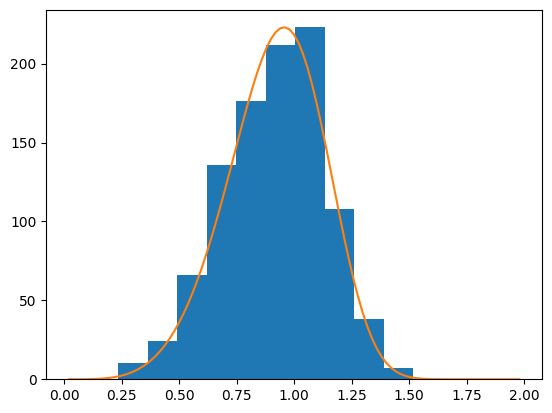

In [ ]:
count, bins, ignored = plt.hist(np.random.weibull(5.,1000))
x = np.arange(1,100.)/50.
scale = count.max()/weib(x, 1., 5.).max()
plt.plot(x, weib(x, 1., 5.)*scale)
plt.show()

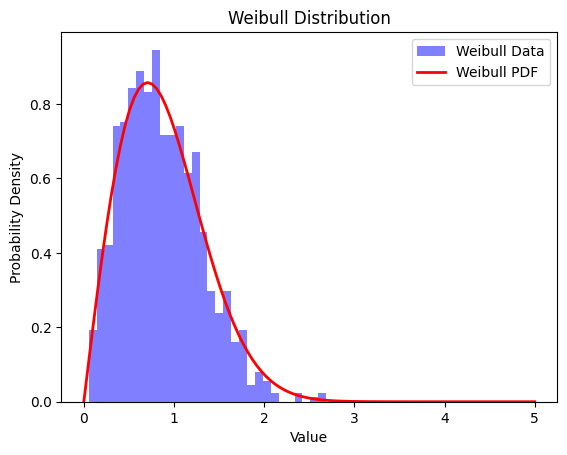

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

# Weibull parameters
c = 2.0  # Shape parameter (can be adjusted)
scale = 1.0  # Scale parameter (can be adjusted)
size = 1000  # Number of samples

# Generate random data from Weibull distribution
data = weibull_min.rvs(c, loc=0, scale=scale, size=size)

# Plot the histogram of the generated data
plt.hist(data, bins=30, density=True, alpha=0.5, color='b', label='Weibull Data')

# Calculate and plot the probability density function (PDF)
x = np.linspace(0, 5, 100)
pdf = weibull_min.pdf(x, c, loc=0, scale=scale)
plt.plot(x, pdf, 'r-', lw=2, label='Weibull PDF')

# Add labels and legend to the plot
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.title('Weibull Distribution')
plt.show()


# Discrete

## pymc.Bernoulli

In [ ]:
d = stats.bernoulli(0.6)

In [ ]:
X = d.rvs(100)
X

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0])

In [ ]:
sum(X)

61

In [ ]:
print(d.pmf(0), d.pmf(1))

0.4 0.6


<BarContainer object of 2 artists>

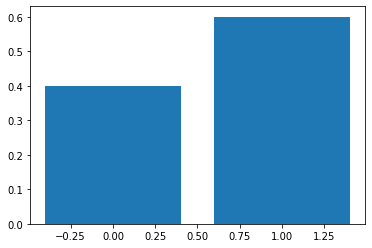

In [ ]:
# plt.bar([0, 1], [d.pmf(0), d.pmf(1)])でも可
plt.bar([0, 1], d.pmf([0, 1]))

In [ ]:
print(d.mean(), d.var())

0.6 0.24


In [ ]:
import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

In [ ]:
p = 0.3
mean, var, skew, kurt = bernoulli.stats(p, moments='mvsk')

In [ ]:
x = np.arange(bernoulli.ppf(0.01, p),
              bernoulli.ppf(0.99, p))
ax.plot(x, bernoulli.pmf(x, p), 'bo', ms=8, label='bernoulli pmf')
ax.vlines(x, 0, bernoulli.pmf(x, p), colors='b', lw=5, alpha=0.5)

In [ ]:
rv = bernoulli(p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
        label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

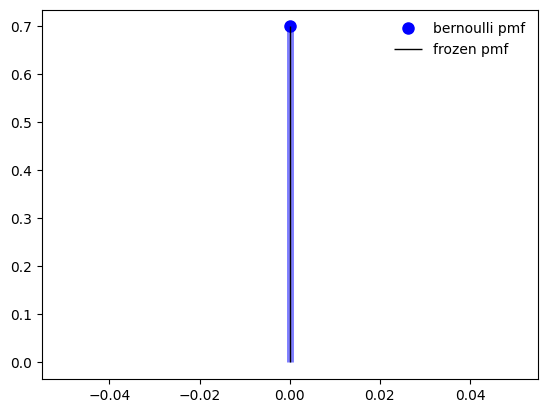

In [ ]:
fig

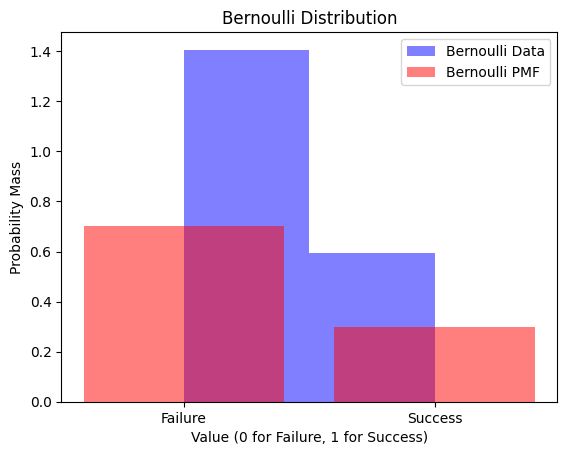

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

# Bernoulli parameter (probability of success)
p = 0.3  # Probability of success (can be adjusted)

# Generate random data from Bernoulli distribution
data = bernoulli.rvs(p, size=1000)

# Plot the histogram of the generated data
plt.hist(data, bins=2, density=True, alpha=0.5, color='b', label='Bernoulli Data')

# Calculate and plot the probability mass function (PMF)
x = [0, 1]
pmf = bernoulli.pmf(x, p)
plt.bar(x, pmf, color='r', alpha=0.5, label='Bernoulli PMF')

# Add labels and legend to the plot
plt.xlabel('Value (0 for Failure, 1 for Success)')
plt.ylabel('Probability Mass')
plt.legend()

# Show the plot
plt.title('Bernoulli Distribution')
plt.xticks(x, ['Failure', 'Success'])
plt.show()


## pymc.BetaBinomial

In [ ]:
import numpy as np
from scipy.stats import betabinom
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

In [ ]:
n, a, b = 5, 2.3, 0.63
mean, var, skew, kurt = betabinom.stats(n, a, b, moments='mvsk')

In [ ]:
x = np.arange(betabinom.ppf(0.01, n, a, b),
              betabinom.ppf(0.99, n, a, b))
ax.plot(x, betabinom.pmf(x, n, a, b), 'bo', ms=8, label='betabinom pmf')
ax.vlines(x, 0, betabinom.pmf(x, n, a, b), colors='b', lw=5, alpha=0.5)

In [ ]:
rv = betabinom(n, a, b)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
        label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

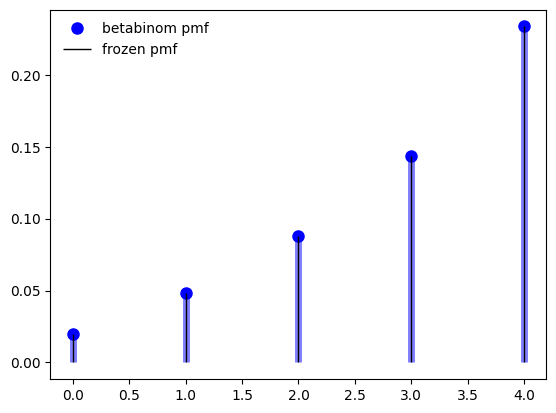

In [ ]:
fig

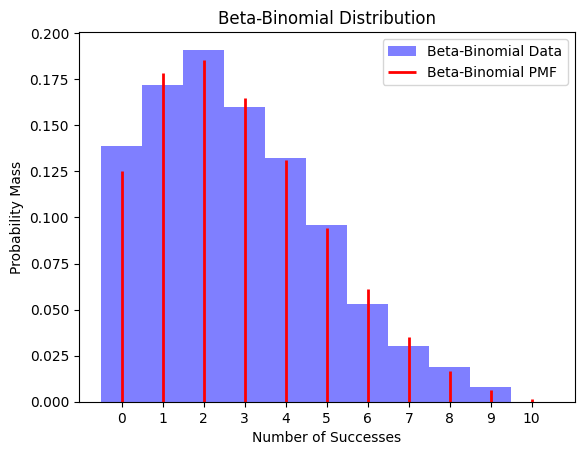

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import betabinom

# Beta-Binomial parameters
n = 10  # Number of trials
a = 2   # Shape parameter of the Beta distribution (can be adjusted)
b = 5   # Shape parameter of the Beta distribution (can be adjusted)

# Generate random data from Beta-Binomial distribution
data = betabinom.rvs(n, a, b, size=1000)

# Plot the histogram of the generated data
plt.hist(data, bins=np.arange(0, n+2) - 0.5, density=True, alpha=0.5, color='b', label='Beta-Binomial Data')

# Calculate and plot the probability mass function (PMF)
x = np.arange(0, n+1)
pmf = betabinom.pmf(x, n, a, b)
plt.vlines(x, 0, pmf, colors='r', lw=2, label='Beta-Binomial PMF')

# Add labels and legend to the plot
plt.xlabel('Number of Successes')
plt.ylabel('Probability Mass')
plt.legend()

# Show the plot
plt.title('Beta-Binomial Distribution')
plt.xticks(x)
plt.show()


## pymc.Binomial

In [ ]:
# 二項分布を定義
N = 8
theta = 0.2
bin_dist = stats.binom(N, theta)

# 定義された二項分布からサンプルを100個生成
X = bin_dist.rvs(100)
X

array([2, 3, 2, 2, 2, 1, 3, 1, 1, 2, 0, 0, 0, 0, 0, 4, 1, 0, 1, 2, 1, 1,
       1, 3, 4, 2, 2, 1, 4, 1, 2, 1, 1, 2, 1, 0, 2, 2, 4, 4, 4, 2, 3, 3,
       2, 1, 1, 0, 3, 2, 1, 1, 5, 0, 3, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 2,
       2, 3, 1, 2, 2, 2, 2, 2, 1, 1, 2, 0, 1, 0, 2, 1, 1, 3, 4, 2, 2, 2,
       2, 0, 1, 2, 1, 2, 0, 1, 2, 2, 1, 1])

average = 1.57
variance = 1.3451


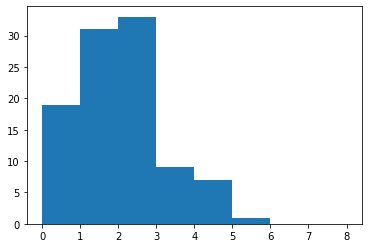

In [ ]:
# ヒストグラムを作成
plt.hist(X, range(N+1))

# サンプルから平均を計算
print('average = ' + str(np.mean(X)))

# サンプルから分散を計算
print('variance = ' + str(np.std(X)**2))

<BarContainer object of 9 artists>

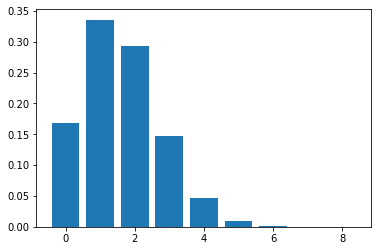

In [ ]:
# 確率質量関数の描画
ar = np.arange(0,N+1)
plt.bar(ar, bin_dist.pmf(ar))

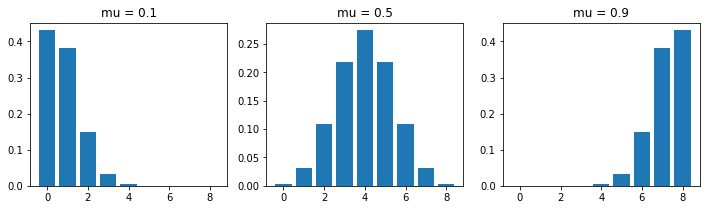

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
params = [0.1, 0.5, 0.9]
for i, param in enumerate(params):
  bin_dist = stats.binom(N, param)
  axes[i].bar(ar, bin_dist.pmf(ar))
  axes[i].set_title('mu = ' + str(param))

In [ ]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

In [ ]:
n, p = 5, 0.4
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

In [ ]:
x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

In [ ]:
rv = binom(n, p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
        label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

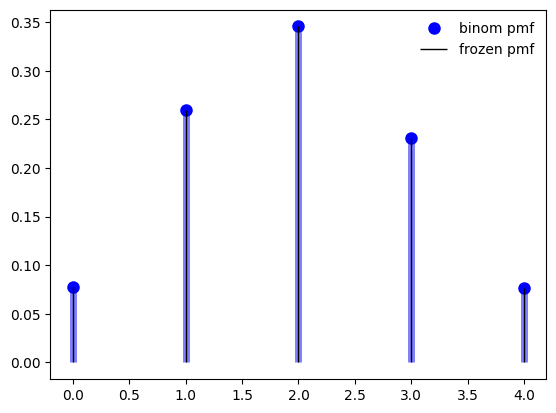

In [ ]:
fig

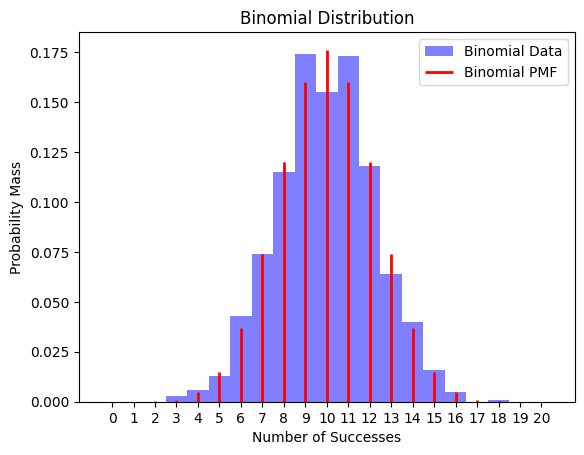

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Binomial parameters
n = 20  # Number of trials
p = 0.5  # Probability of success (can be adjusted)

# Generate random data from Binomial distribution
data = binom.rvs(n, p, size=1000)

# Plot the histogram of the generated data
plt.hist(data, bins=np.arange(0, n+2) - 0.5, density=True, alpha=0.5, color='b', label='Binomial Data')

# Calculate and plot the probability mass function (PMF)
x = np.arange(0, n+1)
pmf = binom.pmf(x, n, p)
plt.vlines(x, 0, pmf, colors='r', lw=2, label='Binomial PMF')

# Add labels and legend to the plot
plt.xlabel('Number of Successes')
plt.ylabel('Probability Mass')
plt.legend()

# Show the plot
plt.title('Binomial Distribution')
plt.xticks(x)
plt.show()


## pymc.Categorical

In [ ]:
# N=1とした多項分布としてカテゴリ分布を定義（π=[0.1, 0.2, 0.3, 0.4]）
cat_dist = stats.multinomial(1, [0.1, 0.2, 0.3, 0.4])

# K=4
K = len(cat_dist.p)

# 定義したカテゴリ分布から100個のサンプルを生成
X_onehot = cat_dist.rvs(100)
X_onehot

In [ ]:
# one-hot表現からカテゴリに変換する
X = [np.argmax(x) for x in X_onehot]
X

(array([ 9., 21., 27., 43.]),
 array([0, 1, 2, 3, 4]),
 <a list of 4 Patch objects>)

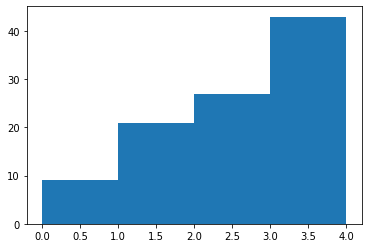

In [ ]:
# ヒストグラムを描く（Kに応じてbinsの値を設定）
plt.hist(X, bins=range(K+1))

In [ ]:
X_tmp = np.identity(K)[range(K)]
X_tmp

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

<BarContainer object of 4 artists>

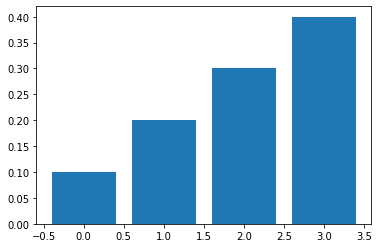

In [ ]:
plt.bar(range(K), cat_dist.pmf(X_tmp))

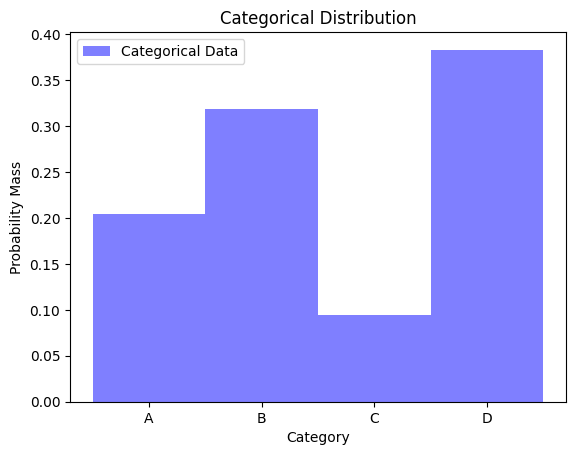

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rv_discrete

# Categorical parameters
categories = np.array(['A', 'B', 'C', 'D'])  # List of categories (can be adjusted)
probabilities = np.array([0.2, 0.3, 0.1, 0.4])  # Probabilities for each category (can be adjusted)

# Create a custom discrete random variable with the given probabilities
custom_categorical = rv_discrete(name='custom_categorical', values=(range(len(categories)), probabilities))

# Generate random data from Categorical distribution
data = custom_categorical.rvs(size=1000)

# Plot the histogram of the generated data
plt.hist(data, bins=np.arange(len(categories) + 1) - 0.5, density=True, alpha=0.5, color='b', label='Categorical Data')

# Add labels and legend to the plot
plt.xlabel('Category')
plt.ylabel('Probability Mass')
plt.xticks(range(len(categories)), categories)
plt.legend()

# Show the plot
plt.title('Categorical Distribution')
plt.show()


## pymc.DiscreteUniform

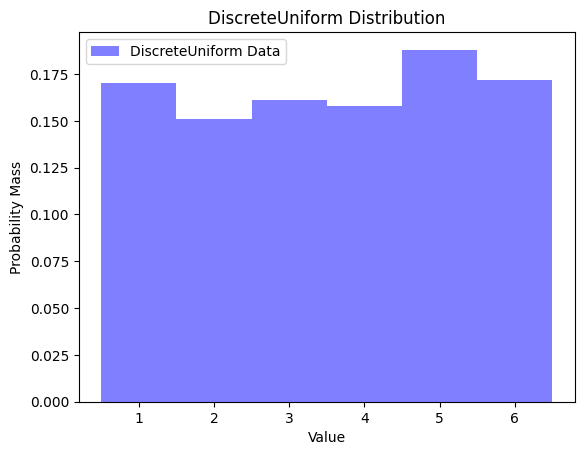

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint

# DiscreteUniform parameters
low = 1  # Lower bound of the range (can be adjusted)
high = 6  # Upper bound of the range (can be adjusted)

# Create a custom discrete random variable representing the DiscreteUniform distribution
custom_discrete_uniform = randint(low, high + 1)

# Generate random data from DiscreteUniform distribution
data = custom_discrete_uniform.rvs(size=1000)

# Plot the histogram of the generated data
plt.hist(data, bins=np.arange(low - 0.5, high + 1.5), density=True, alpha=0.5, color='b', label='DiscreteUniform Data')

# Add labels and legend to the plot
plt.xlabel('Value')
plt.ylabel('Probability Mass')
plt.legend()

# Show the plot
plt.title('DiscreteUniform Distribution')
plt.xticks(np.arange(low, high + 1))
plt.show()


## pymc.DiscreteWeibull

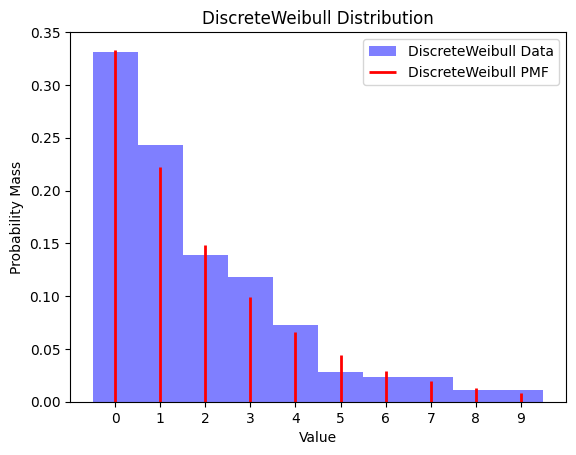

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rv_discrete

# DiscreteWeibull parameters
c = 2  # Shape parameter (can be adjusted)
size = 1000  # Number of samples

# Define the probability mass function (PMF) for DiscreteWeibull distribution
def discrete_weibull_pmf(x, c):
    return (c / (c + 1)) ** x - ((c / (c + 1)) ** (x + 1))

# Generate random data from DiscreteWeibull distribution
data_values = np.arange(0, 10)  # Adjust the range as needed
pmf_values = discrete_weibull_pmf(data_values, c)
data = np.random.choice(data_values, size=size, p=pmf_values / pmf_values.sum())

# Plot the histogram of the generated data
plt.hist(data, bins=np.arange(0, max(data_values) + 2) - 0.5, density=True, alpha=0.5, color='b', label='DiscreteWeibull Data')

# Plot the calculated PMF
plt.vlines(data_values, 0, pmf_values, colors='r', lw=2, label='DiscreteWeibull PMF')

# Add labels and legend to the plot
plt.xlabel('Value')
plt.ylabel('Probability Mass')
plt.legend()

# Show the plot
plt.title('DiscreteWeibull Distribution')
plt.xticks(data_values)
plt.show()


## pymc.Geometric

In [ ]:
import numpy as np
from scipy.stats import geom
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

In [ ]:
p = 0.5
mean, var, skew, kurt = geom.stats(p, moments='mvsk')

In [ ]:
x = np.arange(geom.ppf(0.01, p),
              geom.ppf(0.99, p))
ax.plot(x, geom.pmf(x, p), 'bo', ms=8, label='geom pmf')
ax.vlines(x, 0, geom.pmf(x, p), colors='b', lw=5, alpha=0.5)

In [ ]:
rv = geom(p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
        label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

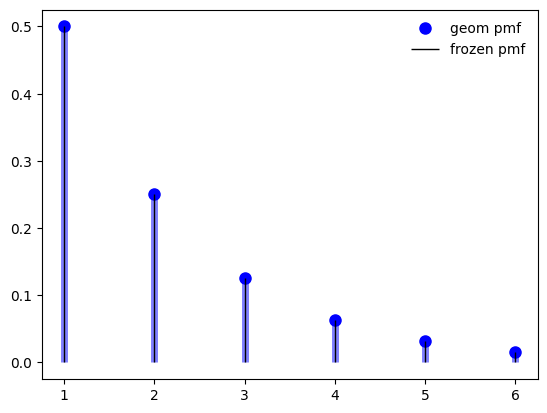

In [ ]:
fig

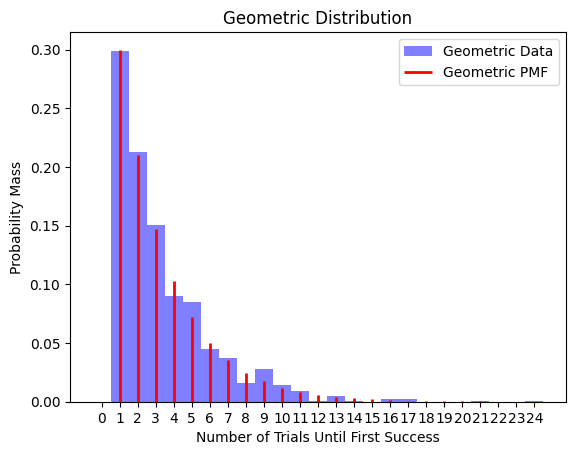

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom

# Geometric parameters
p = 0.3  # Probability of success in each trial (can be adjusted)

# Generate random data from Geometric distribution
data = geom.rvs(p, size=1000)

# Plot the histogram of the generated data
plt.hist(data, bins=np.arange(0, max(data) + 2) - 0.5, density=True, alpha=0.5, color='b', label='Geometric Data')

# Calculate and plot the probability mass function (PMF)
x = np.arange(0, max(data) + 1)
pmf = geom.pmf(x, p)
plt.vlines(x, 0, pmf, colors='r', lw=2, label='Geometric PMF')

# Add labels and legend to the plot
plt.xlabel('Number of Trials Until First Success')
plt.ylabel('Probability Mass')
plt.legend()

# Show the plot
plt.title('Geometric Distribution')
plt.xticks(x)
plt.show()


## pymc.HyperGeometric

In [ ]:
import numpy as np
from scipy.stats import hypergeom
import matplotlib.pyplot as plt

In [ ]:
[M, n, N] = [20, 7, 12]
rv = hypergeom(M, n, N)
x = np.arange(0, n+1)
pmf_dogs = rv.pmf(x)

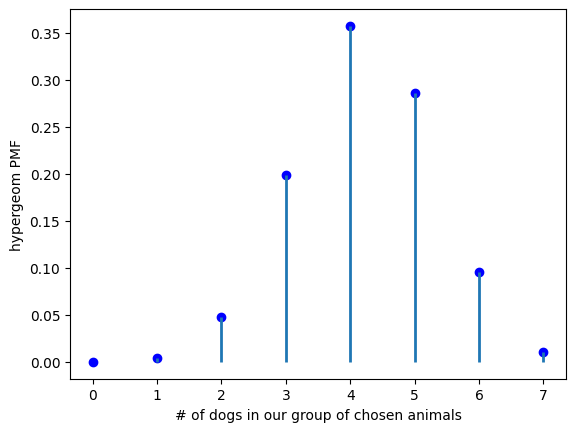

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, pmf_dogs, 'bo')
ax.vlines(x, 0, pmf_dogs, lw=2)
ax.set_xlabel('# of dogs in our group of chosen animals')
ax.set_ylabel('hypergeom PMF')
plt.show()

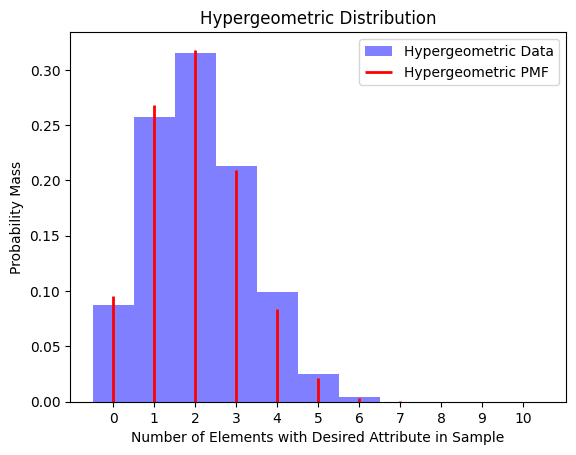

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import hypergeom

# Hypergeometric parameters
M = 100  # Total number of elements in the population (can be adjusted)
n = 20   # Number of elements with the desired attribute in the population (can be adjusted)
N = 10   # Number of draws (can be adjusted)

# Generate random data from Hypergeometric distribution
data = hypergeom.rvs(M, n, N, size=1000)

# Calculate the probability mass function (PMF)
x = np.arange(max(0, N - (M - n)), min(n, N) + 1)
pmf = hypergeom.pmf(x, M, n, N)

# Plot the histogram of the generated data
plt.hist(data, bins=np.arange(min(x) - 0.5, max(x) + 1.5), density=True, alpha=0.5, color='b', label='Hypergeometric Data')

# Plot the calculated PMF
plt.vlines(x, 0, pmf, colors='r', lw=2, label='Hypergeometric PMF')

# Add labels and legend to the plot
plt.xlabel('Number of Elements with Desired Attribute in Sample')
plt.ylabel('Probability Mass')
plt.legend()

# Show the plot
plt.title('Hypergeometric Distribution')
plt.xticks(x)
plt.show()


## pymc.NegativeBinomial

In [ ]:
import numpy as np
from scipy.stats import nbinom
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

In [ ]:
n, p = 5, 0.5
mean, var, skew, kurt = nbinom.stats(n, p, moments='mvsk')

In [ ]:
x = np.arange(nbinom.ppf(0.01, n, p),
              nbinom.ppf(0.99, n, p))
ax.plot(x, nbinom.pmf(x, n, p), 'bo', ms=8, label='nbinom pmf')
ax.vlines(x, 0, nbinom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

In [ ]:
rv = nbinom(n, p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
        label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

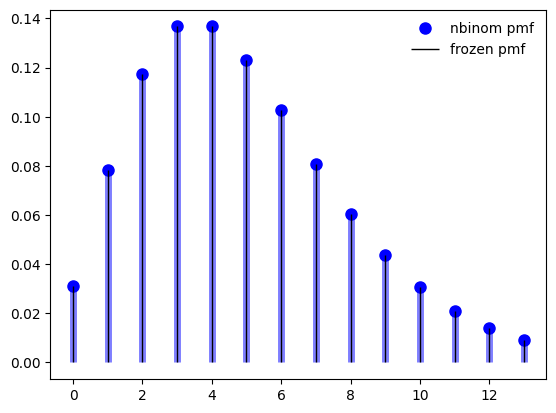

In [ ]:
fig

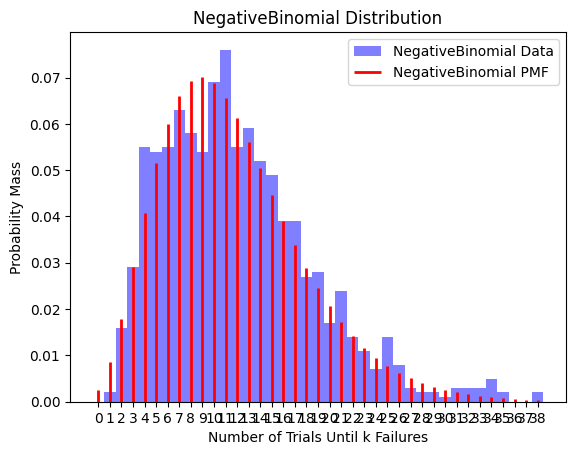

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom

# NegativeBinomial parameters
k = 5    # Number of failures until the experiment stops (can be adjusted)
p = 0.3  # Probability of success in each trial (can be adjusted)

# Generate random data from NegativeBinomial distribution
data = nbinom.rvs(k, p, size=1000)

# Plot the histogram of the generated data
plt.hist(data, bins=np.arange(0, max(data) + 2) - 0.5, density=True, alpha=0.5, color='b', label='NegativeBinomial Data')

# Calculate and plot the probability mass function (PMF)
x = np.arange(0, max(data) + 1)
pmf = nbinom.pmf(x, k, p)
plt.vlines(x, 0, pmf, colors='r', lw=2, label='NegativeBinomial PMF')

# Add labels and legend to the plot
plt.xlabel('Number of Trials Until k Failures')
plt.ylabel('Probability Mass')
plt.legend()

# Show the plot
plt.title('NegativeBinomial Distribution')
plt.xticks(x)
plt.show()


## pymc.OrderedLogistic

## pymc.OrderedProbit

## pymc.Poisson

In [ ]:
# ポアソン分布を定義
poi_dist = stats.poisson(3.0)

# 定義されたポアソン分布からサンプルを100個生成
X = poi_dist.rvs(100)
X

array([2, 6, 0, 5, 3, 3, 4, 4, 3, 3, 2, 1, 4, 4, 2, 2, 6, 4, 1, 4, 3, 1,
       0, 4, 3, 4, 4, 3, 5, 0, 1, 3, 3, 5, 3, 3, 4, 1, 2, 6, 1, 3, 1, 6,
       4, 4, 4, 2, 3, 4, 2, 6, 5, 1, 5, 1, 2, 1, 2, 4, 4, 2, 1, 0, 2, 4,
       2, 0, 4, 1, 3, 3, 2, 1, 2, 0, 5, 3, 2, 2, 4, 2, 1, 6, 3, 2, 0, 5,
       3, 4, 8, 2, 2, 4, 3, 3, 1, 3, 4, 5])

average = 2.9
variance = 2.75


(array([ 7., 15., 20., 21., 22.,  8.,  6.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 29 Patch objects>)

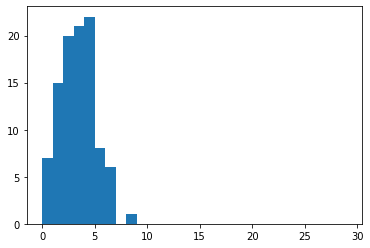

In [ ]:
# サンプルから平均を計算
print('average = ' + str(np.mean(X)))

# サンプルから分散を計算
print('variance = ' + str(np.std(X)**2))

# ヒストグラムを描く
plt.hist(X, range(30))

<BarContainer object of 30 artists>

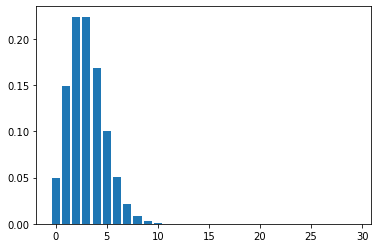

In [ ]:
# 確率質量関数のプロット（適当に30で打ち切る）
ar = np.arange(0,30)
plt.bar(ar, poi_dist.pmf(ar))

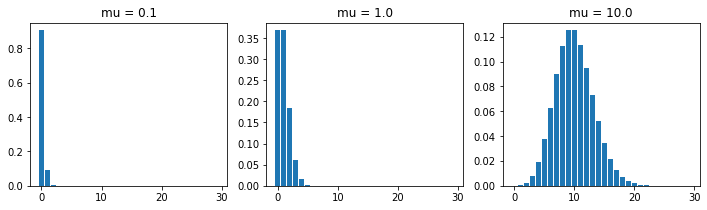

In [ ]:
# ポアソン分布のパラメータを変えてみて，確率質量関数の変化を見てみる
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
params = [0.1, 1.0, 10.0]
for i, param in enumerate(params):
  poi_dist = stats.poisson(param)
  axes[i].bar(np.arange(0,30), poi_dist.pmf(np.arange(0,30)))
  axes[i].set_title('mu = ' + str(param))

In [ ]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

In [ ]:
mu = 0.6
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')

In [ ]:
x = np.arange(poisson.ppf(0.01, mu),
              poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

In [ ]:
rv = poisson(mu)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
        label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

In [ ]:
fig

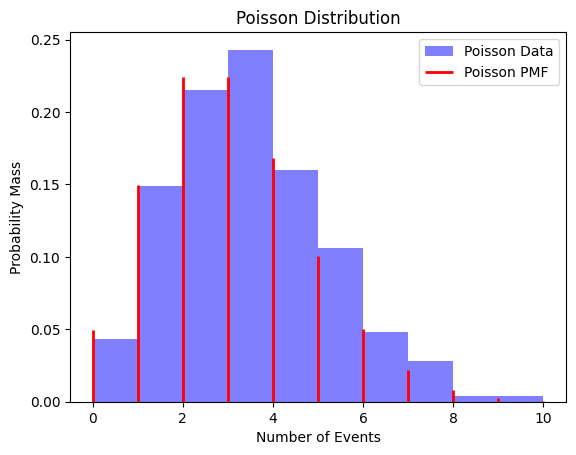

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Poisson分布のパラメータ（平均値、lambda）
lambda_param = 3.0  # 平均値

# Poisson分布からランダムデータを生成
data = poisson.rvs(mu=lambda_param, size=1000)

# 生成したデータのヒストグラムをプロット
plt.hist(data, bins=range(0, max(data) + 1), density=True, alpha=0.5, color='b', label='Poisson Data')

# Poisson分布の確率質量関数（PMF）を計算し、プロット
x = np.arange(0, max(data) + 1)
pmf = poisson.pmf(x, mu=lambda_param)
plt.vlines(x, 0, pmf, colors='r', lw=2, label='Poisson PMF')

# プロットにラベルと凡例を追加
plt.xlabel('Number of Events')
plt.ylabel('Probability Mass')
plt.legend()

# グラフ表示
plt.title('Poisson Distribution')
plt.show()


# Multivariate

## pymc.CAR

## pymc.Dirichlet

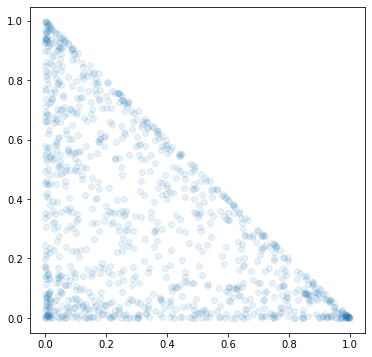

In [ ]:
# ディリクレ分布を定義
dir_dist = stats.dirichlet([0.5, 0.5, 0.5])

# 定義したディリクレ分布から1000個のサンプルを生成
X = dir_dist.rvs(1000)

# 散布図を描く
plt.figure(figsize=(6, 6))
plt.scatter(X[:,0], X[:,1], alpha=0.1)

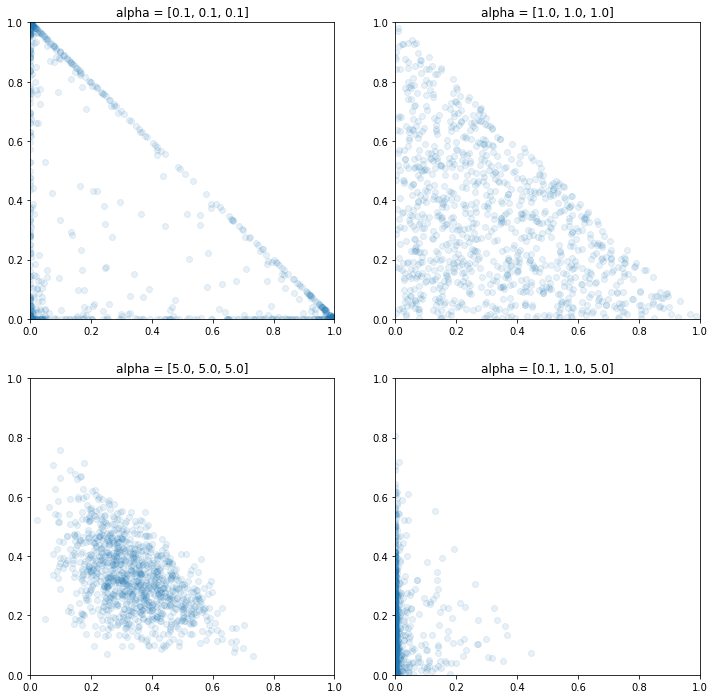

In [ ]:
# αを変えてディリクレ分布をプロットしてみる
alpha_list = [[0.1, 0.1, 0.1], [1.0, 1.0, 1.0],
              [5.0, 5.0, 5.0], [0.1, 1.0, 5.0]]

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
for (i, ax) in enumerate(axes.ravel()):
    alpha = alpha_list[i]
    dir_dist = stats.dirichlet(alpha)
    X = dir_dist.rvs(1000)
    ax.scatter(X[:,0], X[:,1], alpha=0.1)
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_title('alpha = ' + str(alpha))

In [ ]:
s = np.random.dirichlet((10, 5, 3), 20).transpose()

Text(0.5, 1.0, 'Lengths of Strings')

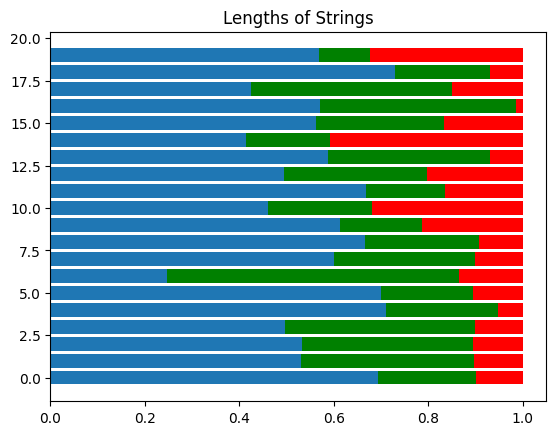

In [ ]:
import matplotlib.pyplot as plt
plt.barh(range(20), s[0])
plt.barh(range(20), s[1], left=s[0], color='g')
plt.barh(range(20), s[2], left=s[0]+s[1], color='r')
plt.title("Lengths of Strings")

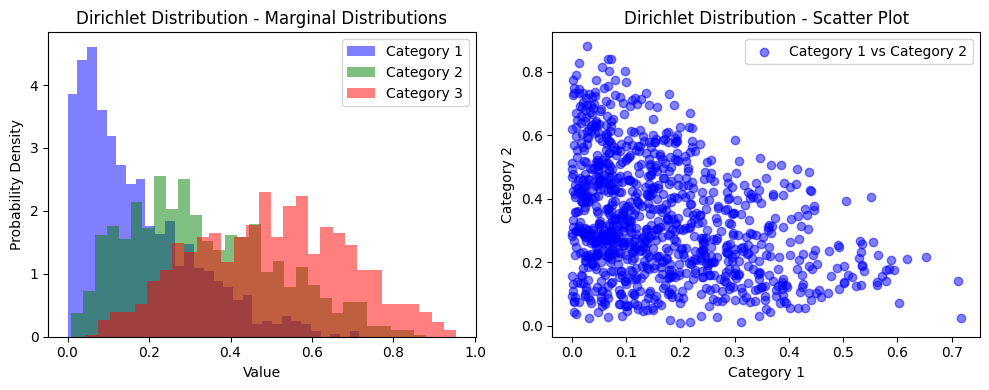

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import dirichlet

# Dirichlet分布のパラメータ
alpha = [1, 2, 3]  # 各カテゴリのパラメータ（例：3つのカテゴリ）

# Dirichlet分布からランダムデータを生成
data = dirichlet.rvs(alpha, size=1000)

# 生成したデータのヒストグラムをプロット
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(data[:, 0], bins=30, density=True, alpha=0.5, color='b', label='Category 1')
plt.hist(data[:, 1], bins=30, density=True, alpha=0.5, color='g', label='Category 2')
plt.hist(data[:, 2], bins=30, density=True, alpha=0.5, color='r', label='Category 3')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.title('Dirichlet Distribution - Marginal Distributions')

# 生成したデータの散布図をプロット
plt.subplot(1, 2, 2)
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, color='b', label='Category 1 vs Category 2')
plt.xlabel('Category 1')
plt.ylabel('Category 2')
plt.legend()
plt.title('Dirichlet Distribution - Scatter Plot')

plt.tight_layout()
plt.show()


## pymc.DirichletMultinomial

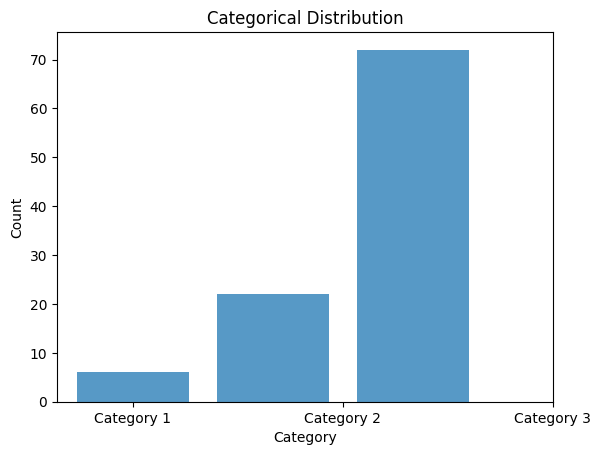

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# パラメータの設定
n = 100  # サンプル数
alpha = [1, 2, 3]  # 各カテゴリのパラメータ（例：3つのカテゴリ）

# Dirichlet分布からランダムデータを生成
dirichlet_samples = np.random.dirichlet(alpha, n)

# カテゴリを選択
categorical_samples = [np.argmax(sample) for sample in dirichlet_samples]

# 生成したデータのヒストグラムをプロット
plt.hist(categorical_samples, bins=len(alpha), rwidth=0.8, align='left', alpha=0.75)
plt.xticks(range(len(alpha)), [f'Category {i+1}' for i in range(len(alpha))])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Categorical Distribution')

plt.show()


## pymc.KroneckerNormal

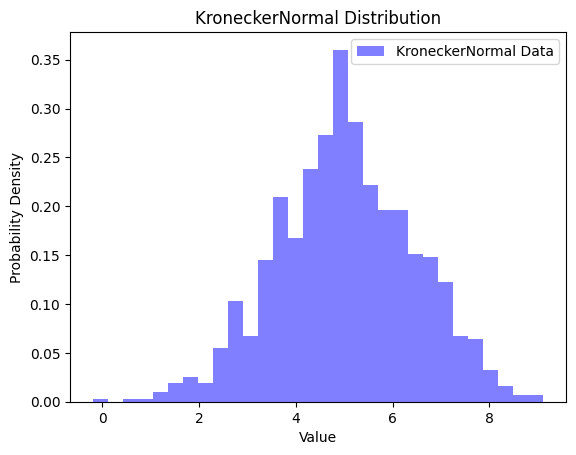

In [ ]:
import numpy as np

# カスタムのKroneckerNormal分布を実装
class KroneckerNormal:
    def __init__(self, mean, variance):
        self.mean = mean
        self.variance = variance

    def rvs(self, size=1):
        # カスタムの乱数生成方法を実装
        samples = np.random.normal(self.mean, np.sqrt(self.variance), size)
        return samples

# パラメータを設定
mean = 5.0
variance = 2.0

# カスタムのKroneckerNormal分布からランダムデータを生成
kn_dist = KroneckerNormal(mean, variance)
data = kn_dist.rvs(size=1000)

# データのヒストグラムをプロット
import matplotlib.pyplot as plt
plt.hist(data, bins=30, density=True, alpha=0.5, color='b', label='KroneckerNormal Data')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.title('KroneckerNormal Distribution')
plt.show()


## pymc.LKJCholeskyCov

## pymc.LKJCorr

## pymc.MatrixNormal

In [ ]:
import numpy as np
from scipy.stats import matrix_normal
M = np.arange(6).reshape(3,2); M
U = np.diag([1,2,3]); U
V = 0.3*np.identity(2); V
X = M + 0.1; X
matrix_normal.pdf(X, mean=M, rowcov=U, colcov=V)

0.023410202050005054

In [ ]:
# Equivalent multivariate normal
from scipy.stats import multivariate_normal
vectorised_X = X.T.flatten()
equiv_mean = M.T.flatten()
equiv_cov = np.kron(V,U)
multivariate_normal.pdf(vectorised_X, mean=equiv_mean, cov=equiv_cov)

0.023410202050005054

## pymc.Multinomial

## pymc.MvNormal

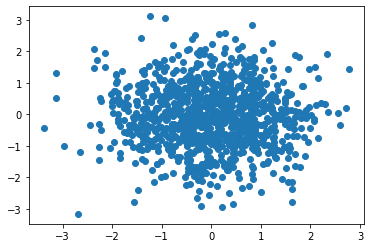

In [ ]:
# 多次元ガウス分布を定義
mu = [0, 0]
Sigma = [[1.0, 0.0],
         [0.0, 1.0]]
mvn_dist = stats.multivariate_normal(mu, Sigma)

# 定義したガウス分布から1000個のサンプルを生成（1000x2の行列）
X = mvn_dist.rvs(1000)

# 散布図を描く
plt.scatter(X[:,0], X[:,1])

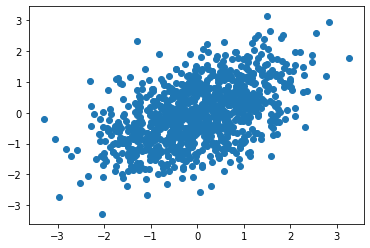

In [ ]:
# 多次元ガウス分布を定義
mu = [0, 0]
Sigma = [[1.0, 0.5],
         [0.5, 1.0]]
mvn_dist = stats.multivariate_normal(mu, Sigma)

# 定義したガウス分布から1000個のサンプルを生成（1000x2の行列）
X = mvn_dist.rvs(1000)

# 散布図を描く
plt.scatter(X[:,0], X[:,1])

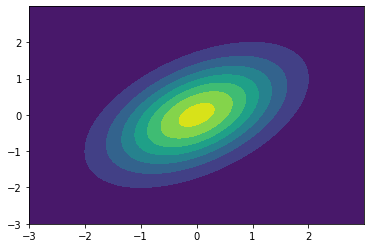

In [ ]:
x1, x2 = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.dstack((x1, x2))
plt.contourf(x1, x2, mvn_dist.pdf(pos))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

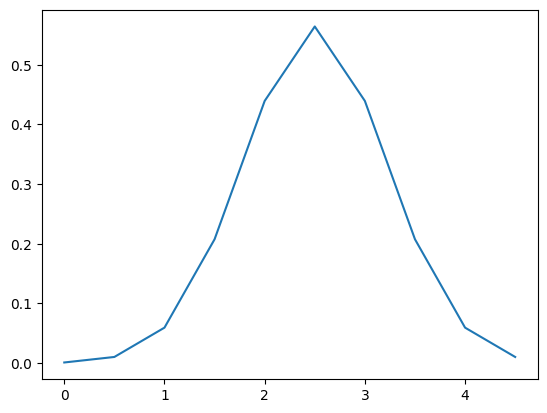

In [ ]:
x = np.linspace(0, 5, 10, endpoint=False)
y = multivariate_normal.pdf(x, mean=2.5, cov=0.5); y
fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.plot(x, y)
plt.show()

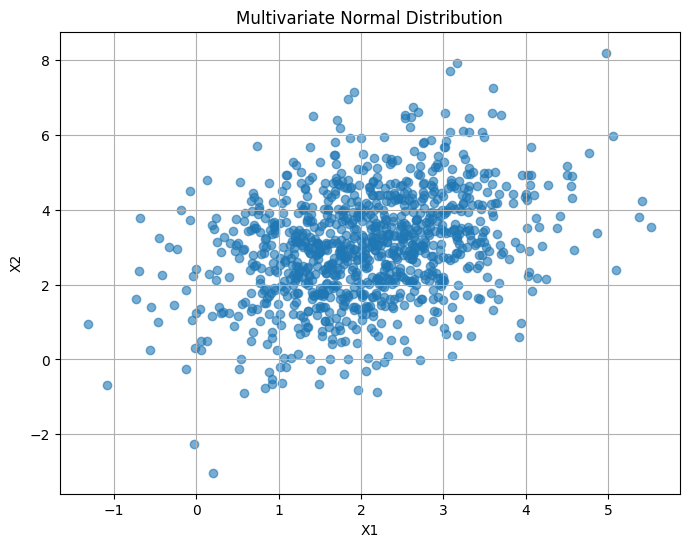

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# パラメータの設定
mean = np.array([2, 3])            # 平均ベクトル
cov_matrix = np.array([[1, 0.5],   # 共分散行列
                       [0.5, 2]])

# サンプル数
n_samples = 1000

# MvNormal分布からランダムデータを生成
data = multivariate_normal.rvs(mean=mean, cov=cov_matrix, size=n_samples)

# 生成したデータの可視化
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.6)
plt.title('Multivariate Normal Distribution')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()


## pymc.MvStudentT

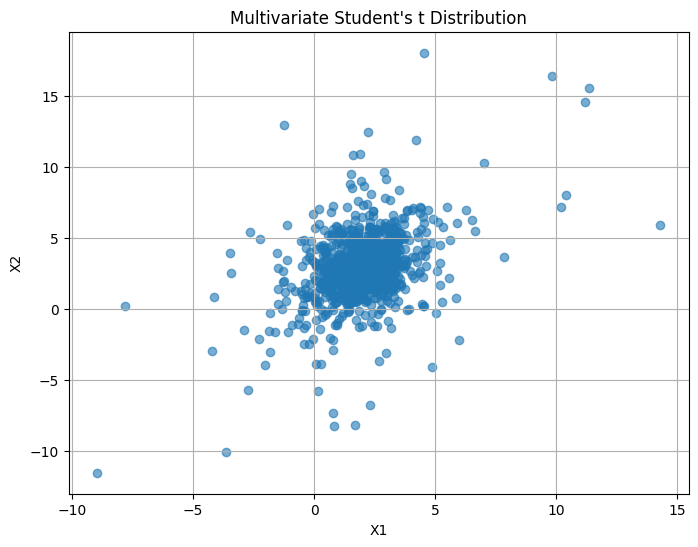

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_t

# パラメータの設定
mean = np.array([2, 3])            # 平均ベクトル
cov_matrix = np.array([[1, 0.5],   # 共分散行列
                       [0.5, 2]])
df = 3  # 自由度

# サンプル数
n_samples = 1000

# MvStudentT分布からランダムデータを生成
data = multivariate_t.rvs(mean, cov_matrix, df, n_samples)

# 生成したデータの可視化
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.6)
plt.title('Multivariate Student\'s t Distribution')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()


## pymc.OrderedMultinomial

In [ ]:
import numpy as np

# パラメータの設定
n_samples = 100  # サンプル数
n_categories = 5  # カテゴリ数
probabilities = [0.1, 0.2, 0.3, 0.2, 0.2]  # 各カテゴリの確率

# OrderedMultinomial分布からランダムデータを生成
data = np.random.multinomial(n_samples, probabilities)

# 生成したデータを表示
print("生成したデータ:")
for category, count in enumerate(data):
    print(f"Category {category + 1}: {count} samples")


生成したデータ:
Category 1: 14 samples
Category 2: 14 samples
Category 3: 36 samples
Category 4: 15 samples
Category 5: 21 samples


## pymc.StickBreakingWeights

# Mixture

## pymc.Mixture

In [ ]:
# パラメータの設定
mu = 0.3
d1 = stats.norm(1.0, 0.5)
d2 = stats.norm(-1.0, 1.0)

# 変数の初期化
N = 10000
Z = np.zeros(N)
X = np.zeros(N)

# 各データをサンプル
for i in range(N):
  Z[i] = stats.bernoulli(mu).rvs()
  if Z[i] == 0:
    X[i] = d1.rvs()
  else:
    X[i] = d2.rvs()

(array([   9.,   48.,  219.,  573.,  912.,  903., 2583., 3786.,  936.,
          31.]),
 array([-4.60947027, -3.83786316, -3.06625605, -2.29464894, -1.52304183,
        -0.75143472,  0.02017239,  0.7917795 ,  1.56338662,  2.33499373,
         3.10660084]),
 <a list of 10 Patch objects>)

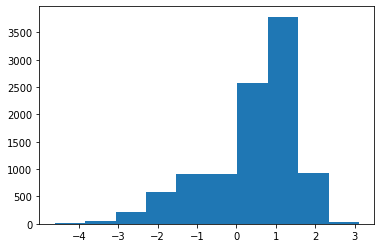

In [ ]:
plt.hist(X, bins=10)

In [ ]:
def mixture_pdf(mu, d1, d2, x):
  return (1.0 - mu)*d1.pdf(x) + mu*d2.pdf(x)

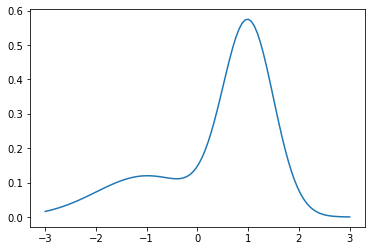

In [ ]:
# 確率密度関数を描画する
ls = np.linspace(-3, 3, 100)
plt.plot(ls, mixture_pdf(mu, d1, d2, ls))

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30906 (\N{CJK UNIFIED IDEOGRAPH-78BA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

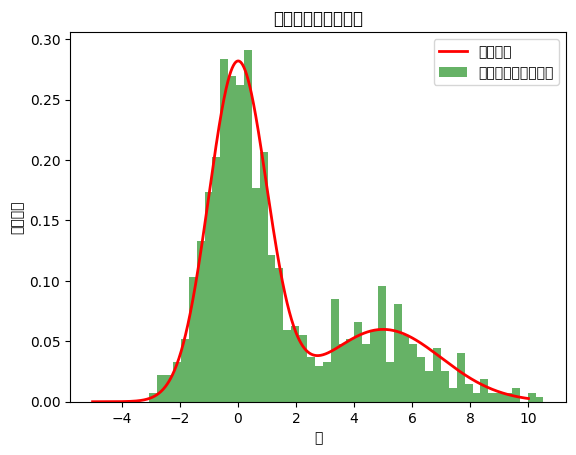

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 正規分布のパラメータを設定します
mean1 = 0
std1 = 1
mean2 = 5
std2 = 2
weight1 = 0.7  # 分布1の重み
weight2 = 0.3  # 分布2の重み

# サンプルデータを生成します
np.random.seed(0)
data = np.concatenate([np.random.normal(mean1, std1, int(1000 * weight1)),
                       np.random.normal(mean2, std2, int(1000 * weight2))])

# ヒストグラムを作成してデータの分布を可視化します
plt.hist(data, bins=50, density=True, alpha=0.6, color='g')

# 混合分布の確率密度関数を計算してプロットします
x = np.linspace(-5, 10, 1000)
pdf1 = norm.pdf(x, mean1, std1)
pdf2 = norm.pdf(x, mean2, std2)
pdf_mixture = weight1 * pdf1 + weight2 * pdf2
plt.plot(x, pdf_mixture, 'r-', lw=2)

plt.xlabel('値')
plt.ylabel('確率密度')
plt.title('正規分布の混合分布')
plt.legend(['混合分布', 'データヒストグラム'])
plt.show()


## pymc.NormalMixture

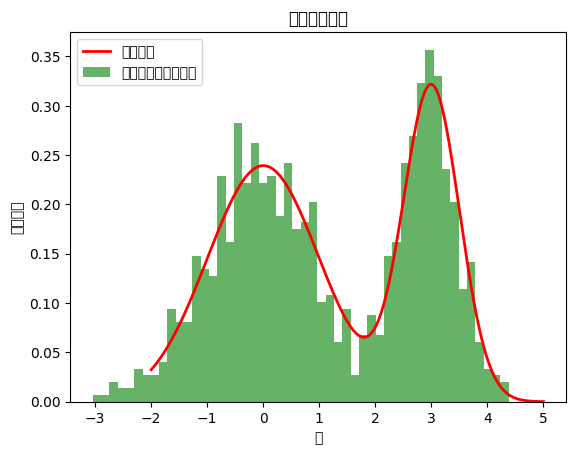

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 正規分布のパラメータを設定します
mean1 = 0
std1 = 1
mean2 = 3
std2 = 0.5
weight1 = 0.6  # 分布1の重み
weight2 = 0.4  # 分布2の重み

# サンプルデータを生成します
np.random.seed(0)
data = np.concatenate([np.random.normal(mean1, std1, int(1000 * weight1)),
                       np.random.normal(mean2, std2, int(1000 * weight2))])

# ヒストグラムを作成してデータの分布を可視化します
plt.hist(data, bins=50, density=True, alpha=0.6, color='g')

# 正規混合分布の確率密度関数を計算してプロットします
x = np.linspace(-2, 5, 1000)
pdf1 = norm.pdf(x, mean1, std1)
pdf2 = norm.pdf(x, mean2, std2)
pdf_mixture = weight1 * pdf1 + weight2 * pdf2
plt.plot(x, pdf_mixture, 'r-', lw=2)

plt.xlabel('値')
plt.ylabel('確率密度')
plt.title('正規混合分布')
plt.legend(['混合分布', 'データヒストグラム'])
plt.show()


## pymc.ZeroInflatedBinomial

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12476 (\N{KATAKANA LETTER ZE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12525 (\N{KATAKANA LETTER RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33192 (\N{CJK UNIFIED IDEOGRAPH-81A8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24373 (\N{CJK UNIFIED IDEOGRAPH-5F35}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20108 (\N{CJK UNIFIED IDEOGRAPH-4E8C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python

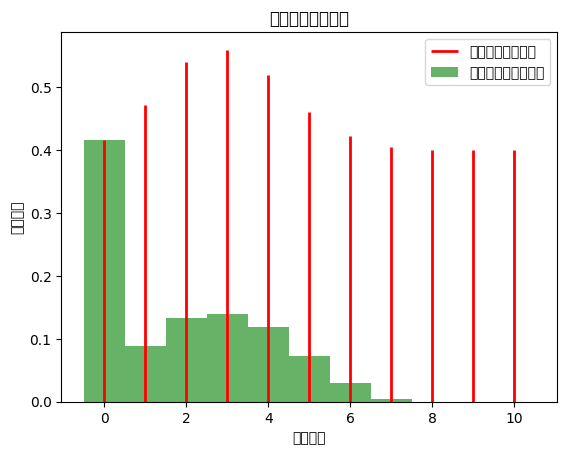

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# 二項分布のパラメータを設定します
n_trials = 10  # 試行回数
p_success = 0.3  # 成功確率

# ゼロ膨張成分の確率を設定します
p_zero = 0.4  # ゼロ膨張確率

# サンプルデータを生成します
np.random.seed(0)
data = []
for _ in range(1000):
    if np.random.random() < p_zero:
        data.append(0)  # ゼロが選ばれる
    else:
        data.append(np.random.binomial(n_trials, p_success))

# ヒストグラムを作成してデータの分布を可視化します
plt.hist(data, bins=np.arange(-0.5, n_trials + 1.5, 1), density=True, alpha=0.6, color='g')

# ゼロ膨張二項分布の確率質量関数を計算してプロットします
x = np.arange(0, n_trials + 1)
pmf_zero = p_zero + (1 - p_zero) * binom.pmf(x, n_trials, p_success)
plt.vlines(x, 0, pmf_zero, colors='r', lw=2)

plt.xlabel('成功回数')
plt.ylabel('確率密度')
plt.title('ゼロ膨張二項分布')
plt.legend(['ゼロ膨張二項分布', 'データヒストグラム'])
plt.show()


## pymc.ZeroInflatedNegativeBinomial

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36000 (\N{CJK UNIFIED IDEOGRAPH-8CA0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


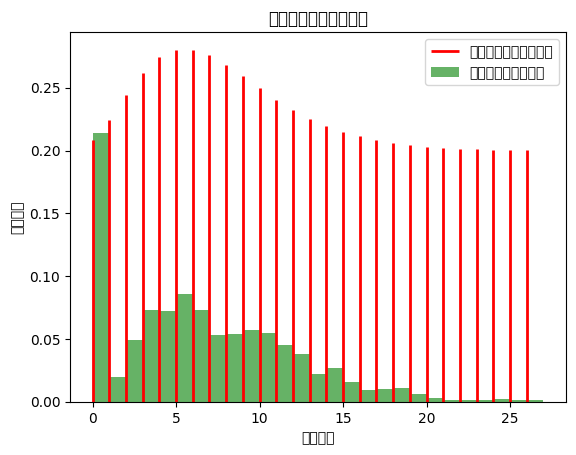

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom

# 負の二項分布のパラメータを設定します
r = 5  # 成功までの試行回数の平均
p_failure = 0.4  # 失敗確率

# ゼロ膨張成分の確率を設定します
p_zero = 0.2  # ゼロ膨張確率

# サンプルデータを生成します
np.random.seed(0)
data = []
for _ in range(1000):
    if np.random.random() < p_zero:
        data.append(0)  # ゼロが選ばれる
    else:
        data.append(np.random.negative_binomial(r, p_failure))

# ヒストグラムを作成してデータの分布を可視化します
plt.hist(data, bins=np.arange(0, max(data) + 1.5, 1), density=True, alpha=0.6, color='g')

# ゼロ膨張負の二項分布の確率質量関数を計算してプロットします
x = np.arange(0, max(data) + 1)
pmf_zero = p_zero + (1 - p_zero) * nbinom.pmf(x, r, p_failure)
plt.vlines(x, 0, pmf_zero, colors='r', lw=2)

plt.xlabel('成功回数')
plt.ylabel('確率密度')
plt.title('ゼロ膨張負の二項分布')
plt.legend(['ゼロ膨張負の二項分布', 'データヒストグラム'])
plt.show()


## pymc.ZeroInflatedPoisson

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12509 (\N{KATAKANA LETTER PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12450 (\N{KATAKANA LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12477 (\N{KATAKANA LETTER SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30330 (\N{CJK UNIFIED IDEOGRAPH-767A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

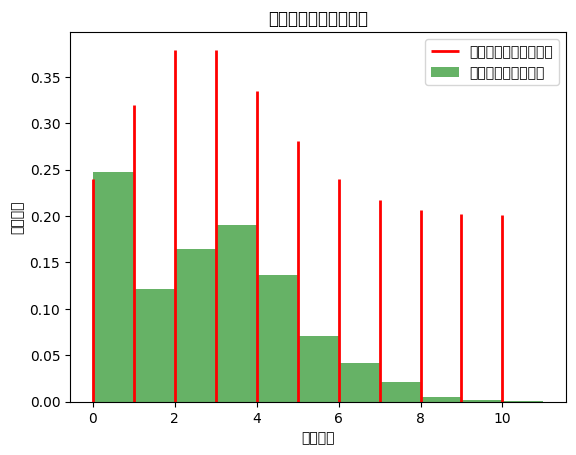

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# ポアソン分布の平均パラメータを設定します
lambda_param = 3.0  # 平均発生率

# ゼロ膨張成分の確率を設定します
p_zero = 0.2  # ゼロ膨張確率

# サンプルデータを生成します
np.random.seed(0)
data = []
for _ in range(1000):
    if np.random.random() < p_zero:
        data.append(0)  # ゼロが選ばれる
    else:
        data.append(np.random.poisson(lambda_param))

# ヒストグラムを作成してデータの分布を可視化します
plt.hist(data, bins=np.arange(0, max(data) + 1.5, 1), density=True, alpha=0.6, color='g')

# ゼロ膨張ポアソン分布の確率質量関数を計算してプロットします
x = np.arange(0, max(data) + 1)
pmf_zero = p_zero + (1 - p_zero) * poisson.pmf(x, lambda_param)
plt.vlines(x, 0, pmf_zero, colors='r', lw=2)

plt.xlabel('発生回数')
plt.ylabel('確率密度')
plt.title('ゼロ膨張ポアソン分布')
plt.legend(['ゼロ膨張ポアソン分布', 'データヒストグラム'])
plt.show()


## pymc.HurdlePoisson

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12495 (\N{KATAKANA LETTER HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12489 (\N{KATAKANA LETTER DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12523 (\N{KATAKANA LETTER RU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


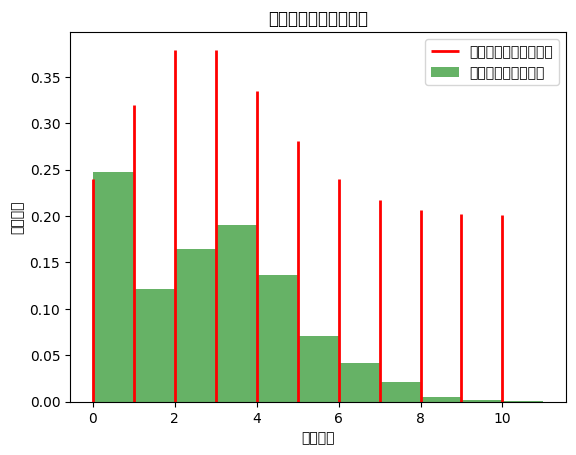

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# ポアソン分布の平均パラメータを設定します
lambda_param = 3.0  # 平均発生率

# ゼロ膨張成分の確率を設定します
p_zero = 0.2  # ゼロ膨張確率

# サンプルデータを生成します
np.random.seed(0)
data = []
for _ in range(1000):
    if np.random.random() < p_zero:
        data.append(0)  # ゼロが選ばれる
    else:
        data.append(np.random.poisson(lambda_param))

# ヒストグラムを作成してデータの分布を可視化します
plt.hist(data, bins=np.arange(0, max(data) + 1.5, 1), density=True, alpha=0.6, color='g')

# ハードルポアソン分布の確率質量関数を計算してプロットします
x = np.arange(0, max(data) + 1)
pmf_zero = p_zero + (1 - p_zero) * poisson.pmf(x, lambda_param)
plt.vlines(x, 0, pmf_zero, colors='r', lw=2)

plt.xlabel('発生回数')
plt.ylabel('確率密度')
plt.title('ハードルポアソン分布')
plt.legend(['ハードルポアソン分布', 'データヒストグラム'])
plt.show()



## pymc.HurdleNegativeBinomial

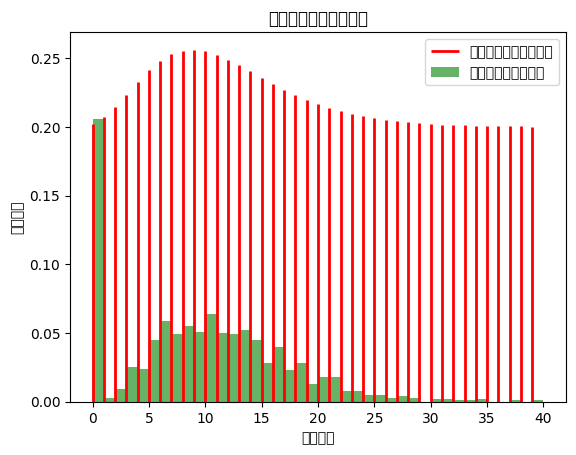

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom

# 負の二項分布のパラメータを設定します
r = 5  # 成功までの試行回数の平均
p_failure = 0.3  # 失敗確率

# ゼロ膨張成分の確率を設定します
p_zero = 0.2  # ゼロ膨張確率

# サンプルデータを生成します
np.random.seed(0)
data = []
for _ in range(1000):
    if np.random.random() < p_zero:
        data.append(0)  # ゼロが選ばれる
    else:
        data.append(np.random.negative_binomial(r, p_failure))

# ヒストグラムを作成してデータの分布を可視化します
plt.hist(data, bins=np.arange(0, max(data) + 1.5, 1), density=True, alpha=0.6, color='g')

# ハードル負の二項分布の確率質量関数を計算してプロットします
x = np.arange(0, max(data) + 1)
pmf_zero = p_zero + (1 - p_zero) * nbinom.pmf(x, r, p_failure)
plt.vlines(x, 0, pmf_zero, colors='r', lw=2)

plt.xlabel('成功回数')
plt.ylabel('確率密度')
plt.title('ハードル負の二項分布')
plt.legend(['ハードル負の二項分布', 'データヒストグラム'])
plt.show()


## pymc.HurdleGamma

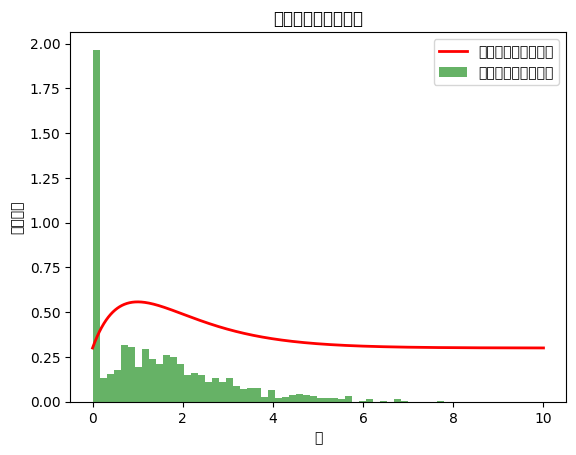

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# ガンマ分布のパラメータを設定します
shape = 2.0  # 形状パラメータ
scale = 1.0  # 尺度パラメータ

# ゼロ膨張成分の確率を設定します
p_zero = 0.3  # ゼロ膨張確率

# サンプルデータを生成します
np.random.seed(0)
data = []
for _ in range(1000):
    if np.random.random() < p_zero:
        data.append(0.0)  # ゼロが選ばれる
    else:
        data.append(np.random.gamma(shape, scale))

# ヒストグラムを作成してデータの分布を可視化します
plt.hist(data, bins=50, density=True, alpha=0.6, color='g')

# ハードルガンマ分布の確率密度関数を計算してプロットします
x = np.linspace(0, 10, 1000)
pdf_zero = p_zero + (1 - p_zero) * gamma.pdf(x, shape, scale=scale)
plt.plot(x, pdf_zero, 'r-', lw=2)

plt.xlabel('値')
plt.ylabel('確率密度')
plt.title('ハードルガンマ分布')
plt.legend(['ハードルガンマ分布', 'データヒストグラム'])
plt.show()


## pymc.HurdleLogNormal

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23550 (\N{CJK UNIFIED IDEOGRAPH-5BFE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


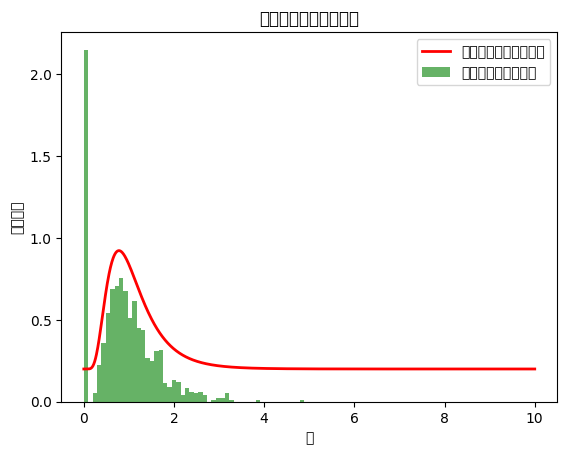

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# 対数正規分布のパラメータを設定します
sigma = 0.5  # 標準偏差
mu = 0.0  # 平均

# ゼロ膨張成分の確率を設定します
p_zero = 0.2  # ゼロ膨張確率

# サンプルデータを生成します
np.random.seed(0)
data = []
for _ in range(1000):
    if np.random.random() < p_zero:
        data.append(0.0)  # ゼロが選ばれる
    else:
        data.append(np.random.lognormal(mean=mu, sigma=sigma))

# ヒストグラムを作成してデータの分布を可視化します
plt.hist(data, bins=50, density=True, alpha=0.6, color='g')

# ハードル対数正規分布の確率密度関数を計算してプロットします
x = np.linspace(0, 10, 1000)
pdf_zero = p_zero + (1 - p_zero) * lognorm.pdf(x, s=sigma, loc=0, scale=np.exp(mu))
plt.plot(x, pdf_zero, 'r-', lw=2)

plt.xlabel('値')
plt.ylabel('確率密度')
plt.title('ハードル対数正規分布')
plt.legend(['ハードル対数正規分布', 'データヒストグラム'])
plt.show()


# Timeseries

## pymc.AR

## pymc.EulerMaruyama

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# パラメータ設定
mu = 0.1  # ブラウン運動の平均
sigma = 0.2  # ブラウン運動の標準偏差
T = 1.0  # シミュレーションの終了時刻
N = 1000  # シミュレーションのステップ数
dt = T / N  # 時間ステップ

# 初期値
X0 = 0.0
X = np.zeros(N+1)
X[0] = X0

# Euler-Maruyama法で確率過程を生成
for i in range(1, N+1):
    dW = np.random.normal(0.0, np.sqrt(dt))  # Wiener過程の差分
    X[i] = X[i-1] + mu * X[i-1] * dt + sigma * X[i-1] * dW

# 結果の可視化
plt.plot(np.linspace(0, T, N+1), X)
plt.xlabel('時間')
plt.ylabel('ブラウン運動の値')
plt.title('Euler-Maruyama法によるブラウン運動のシミュレーション')
plt.show()


## pymc.GARCH11

## pymc.GaussianRandomWalk

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# パラメータ設定
n = 100  # ステップ数
mu = 0.0  # 平均
sigma = 1.0  # 標準偏差

# ガウシアンランダムウォークの生成
np.random.seed(0)
random_walk = np.cumsum(np.random.normal(mu, sigma, n))

# プロット
plt.plot(range(n), random_walk)
plt.xlabel('ステップ数')
plt.ylabel('ランダムウォークの値')
plt.title('ガウシアンランダムウォーク')
plt.show()


## pymc.MvGaussianRandomWalk

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20803 (\N{CJK UNIFIED IDEOGRAPH-5143}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22810 (\N{CJK UNIFIED IDEOGRAPH-591A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22793 (\N{CJK UNIFIED IDEOGRAPH-5909}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


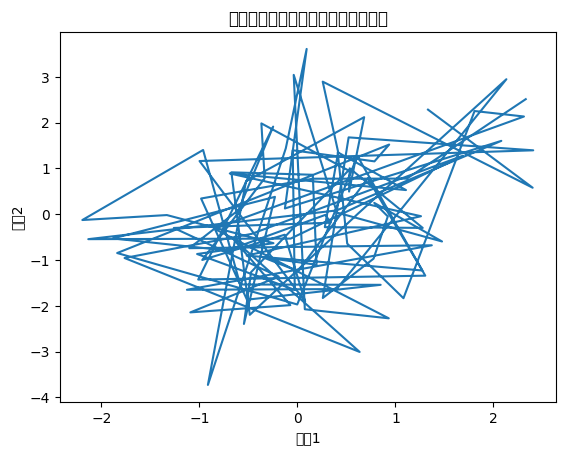

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# パラメータ設定
n = 100  # ステップ数
num_dimensions = 2  # 次元数
mean = np.zeros(num_dimensions)  # 平均
covariance_matrix = np.array([[1.0, 0.5], [0.5, 2.0]])  # 共分散行列

# 多変量ガウシアンランダムウォークの生成
np.random.seed(0)
random_walk = np.random.multivariate_normal(mean, covariance_matrix, n).T

# プロット
plt.plot(random_walk[0], random_walk[1])
plt.xlabel('次元1')
plt.ylabel('次元2')
plt.title('多変量ガウシアンランダムウォーク')
plt.show()


## pymc.MvStudentTRandomWalk

# Truncated

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20999 (\N{CJK UNIFIED IDEOGRAPH-5207}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26029 (\N{CJK UNIFIED IDEOGRAPH-65AD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


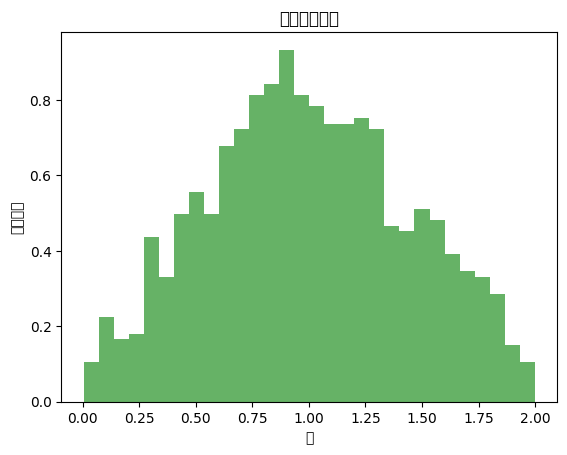

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

# パラメータ設定
lower_bound = 0.0  # 下限
upper_bound = 2.0  # 上限
mean = 1.0  # 正規分布の平均
std_dev = 0.5  # 正規分布の標準偏差

# 切断正規分布の生成
np.random.seed(0)
truncated_data = truncnorm.rvs(
    (lower_bound - mean) / std_dev, (upper_bound - mean) / std_dev,
    loc=mean, scale=std_dev, size=1000
)

# プロット
plt.hist(truncated_data, bins=30, density=True, alpha=0.6, color='g')
plt.xlabel('値')
plt.ylabel('確率密度')
plt.title('切断正規分布')
plt.show()


# Censored

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12426 (\N{HIRAGANA LETTER RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35440 (\N{CJK UNIFIED IDEOGRAPH-8A70}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12417 (\N{HIRAGANA LETTER ME}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12425 (\N{HIRAGANA LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12428 (\N{HIRAGANA LETTER RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

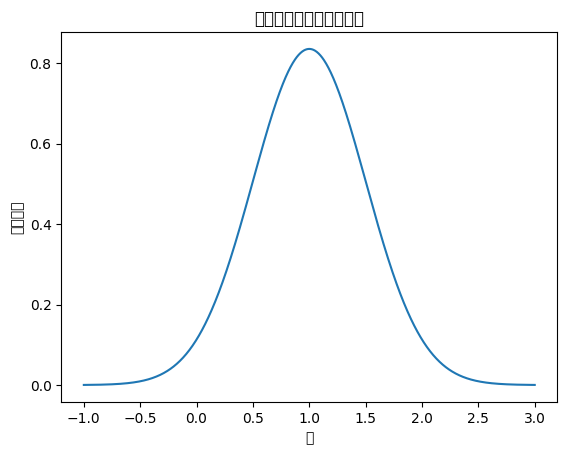

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# パラメータ設定
lower_bound = 0.0  # 下限
upper_bound = 2.0  # 上限
mean = 1.0  # 正規分布の平均
std_dev = 0.5  # 正規分布の標準偏差

# 切り詰められた正規分布の確率密度関数を計算
x = np.linspace(lower_bound - 1, upper_bound + 1, 1000)
truncated_pdf = norm.pdf(x, loc=mean, scale=std_dev) / (norm.cdf(upper_bound, loc=mean, scale=std_dev) - norm.cdf(lower_bound, loc=mean, scale=std_dev))

# プロット
plt.plot(x, truncated_pdf)
plt.xlabel('値')
plt.ylabel('確率密度')
plt.title('切り詰められた正規分布')
plt.show()


# Simulator

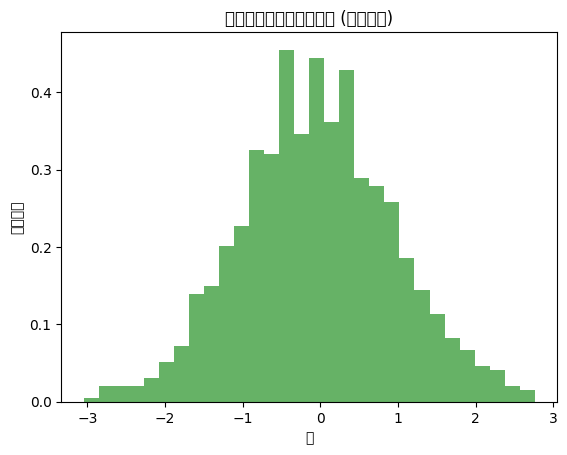

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# パラメータ設定
mean = 0.0  # 平均
std_dev = 1.0  # 標準偏差
sample_size = 1000  # サンプルサイズ

# 正規分布を基にしたシミュレーションデータの生成
np.random.seed(0)
simulated_data = np.random.normal(mean, std_dev, sample_size)

# プロット
plt.hist(simulated_data, bins=30, density=True, alpha=0.6, color='g')
plt.xlabel('値')
plt.ylabel('確率密度')
plt.title('シミュレーションデータ (正規分布)')
plt.show()


# Transformations

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# パラメータ設定
mean = 1.0  # 正規分布の平均
std_dev = 0.5  # 正規分布の標準偏差
sample_size = 1000  # サンプルサイズ

# 正規分布からデータ生成
np.random.seed(0)
normal_data = np.random.normal(mean, std_dev, sample_size)

# データに対数変換を適用
log_data = np.log(normal_data)

# プロット
plt.subplot(1, 2, 1)
plt.hist(normal_data, bins=30, density=True, alpha=0.6, color='g')
plt.xlabel('値')
plt.ylabel('確率密度')
plt.title('正規分布')

plt.subplot(1, 2, 2)
plt.hist(log_data, bins=30, density=True, alpha=0.6, color='b')
plt.xlabel('値 (対数スケール)')
plt.ylabel('確率密度')
plt.title('対数変換後の分布')

plt.tight_layout()
plt.show()


## Transform Instances

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# サンプルデータ生成
data = pd.DataFrame({'Feature1': [10, 20, 30, 40],
                     'Feature2': [0.1, 0.5, 1.0, 2.0]})

# データの標準化（平均0、標準偏差1に変換）
scaler = StandardScaler()
transformed_data = scaler.fit_transform(data)

# 変換後のデータ表示
print("変換後のデータ:")
print(transformed_data)


変換後のデータ:
[[-1.34164079 -1.12575607]
 [-0.4472136  -0.56287804]
 [ 0.4472136   0.14071951]
 [ 1.34164079  1.5479146 ]]


## Specific Transform Classes

In [ ]:
import numpy as np

# 特定の変換クラスを定義
class MyTransformation:
    def __init__(self, parameter):
        self.parameter = parameter

    def transform(self, data):
        # ここで特定の変換を実行
        transformed_data = data + self.parameter
        return transformed_data

# データの生成
data = np.array([1, 2, 3, 4, 5])

# 変換クラスのインスタンス化
transformation = MyTransformation(2)  # 例: データに2を加える変換

# データの変換
transformed_data = transformation.transform(data)

# 変換後のデータ表示
print("変換後のデータ:")
print(transformed_data)


変換後のデータ:
[3 4 5 6 7]


# Distribution utilities

## pymc.Continuous

## pymc.CustomDist

## pymc.Discrete

## pymc.Distribution

## pymc.SymbolicRandomVariable

## pymc.DiracDelta

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30906 (\N{CJK UNIFIED IDEOGRAPH-78BA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12487 (\N{KATAKANA LETTER DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12451 (\N{KATAKANA LETTER SMALL I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.1

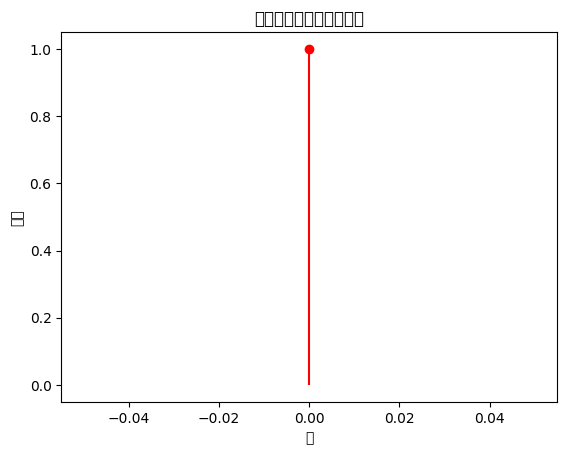

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ディラックのデルタ関数を生成
x = np.array([0.0])
y = np.array([1.0])

# プロット
plt.stem(x, y, basefmt=' ', markerfmt='ro', linefmt='r-')
plt.xlabel('値')
plt.ylabel('確率')
plt.title('ディラックのデルタ関数')
plt.show()


# 回帰モデル

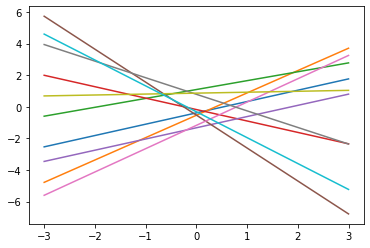

In [ ]:
N = 10

ls = np.linspace(-3, 3, 100)
plt.figure()
for i in range(N):
  a = stats.norm(0,1).rvs()
  b = stats.norm(0,1).rvs()
  plt.plot(ls, a*ls+b)

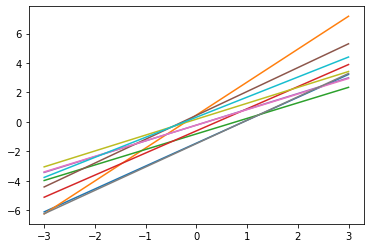

In [ ]:
plt.figure()
for i in range(N):
  a = stats.gamma(1,1).rvs()
  b = stats.norm(0,1).rvs()
  plt.plot(ls, a*ls+b)

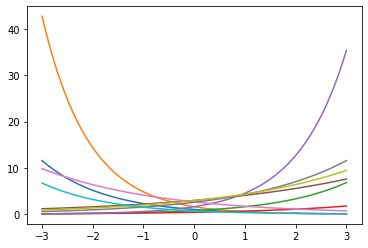

In [ ]:
plt.figure()
for i in range(N):
  a = stats.norm(0,1).rvs()
  b = stats.norm(0,1).rvs()
  plt.plot(ls, np.exp(a*ls+b))